 ## UK Road Safety: Traffic Accidents and Vehicles
 
 The goal of this project is the investigate what causes Serious and Fatal accidents in hopes of preventing and decreasing the number of them. The dataset consists of accident records from the UK over the course of 15+ years. I hope to show the causes of these accidents through visualizations and create an algorithm that can predict the severity of accidents. 
 
The UK government collects and publishes (usually on an annual basis) detailed information about traffic accidents across the country. This information includes, but is not limited to, geographical locations, weather conditions, type of vehicles, number of casualties and vehicle manoeuvres, making this a very interesting and comprehensive dataset for analysis and research.

The data that I'm using is compiled and available through [Kaggle](https://www.kaggle.com/tsiaras/uk-road-safety-accidents-and-vehicles) and in a less compliled form, [here](https://beta.ukdataservice.ac.uk/datacatalogue/series/series?id=2000045). 

Genesis L. Taylor<br>
[Github](https://github.com/GenTaylor/) | [Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com)


Problem: Traffic Accidents<br>
Solution Method: Use data to figure out how to lower the number of accidents and the severity of them.

### Table of Contents
* [Importing and Data Merging](#Importing-and-Data-Merging)<br>
* [Data Cleaning](#Data-Cleaning)<br>
* [Nulls and Outliers](#Nulls-and-Outliers)<br>
* [Feature Manipulation, Creation and Engineering](#Feature-Manipulation-Creation-and-Engineering)<br>
* [General Visualizations](#General-Visualizations)<br>
    * [Accident Forecasting with Tableau](#Accident-Forecasting-with-Tableau)<br>
* [Correlations](#Correlations)<br>
    * [Chi-Squared Test](#Chi-Squared-Test)
* [Visualizations In Relation to Accident Seriousness](#Visualizations-In-Relation-to-Accident-Seriousness)<br>
    * [Visualization Summary](#Visualization-Summary)
* [Other Visualizations](#Other-Visualizations)<br>
    * [Other Visualizations Summary](#Other-Visualizations-Summary)<br>
* [Solution](#Solution)<br>
    * [Web Scraping](#Web-Scraping)<br>
    * [Mapping of Problem Areas](#Mapping-of-Problem-Areas)<br>
* [Machine Learning](#Machine-Learning)<br>
    * [Preprocessing](#Preprocessing)<br>
    * [Imbalanced Data](#Imbalanced-Data)<br>
    * [Resample: Undersampling](#Resample:-Undersampling)<br>
    * [Unsupervised Learning](#Unsupervised-Learning)<br>
    * [Supervised Learning with Resampling as Undersampling](#Supervised-Learning-with-Resampling-as-Undersampling)<br>
    * [Supervised Learning Results](#Supervised-Learning-Results)<br>
    


### Links to Other Notebooks And Presentation
__[UK Road Safety: Traffic Accidents and Vehicles Introduction, Data Cleaning, and Feature Manipulation](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Introduction, Data Cleaning, and Feature Manipulation: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb)__<br>
<br>

__[UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Visualizations_and_Solution.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Visualizations_and_Solution.ipynb)__<br>
<br>
__[UK Road Safety: Traffic Accidents and Vehicles Machine Learning](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Machine_Learning.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Machine Learning: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Machine_Learning.ipynb)__<br>
<br>
__[Traffic Analysis and Severity Prediction Powerpoint Presentation]("Traffic_Analysis_and_Severity_Prediction.pptx")__<br>
__[Traffic Analysis and Severity Prediction Powerpoint Presentation: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/Traffic_Analysis_and_Severity_Prediction.pptx)__<br>

### Importing and Data Merging

In [1]:
#Import modules
import numpy as np
import holidays
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

#other learners
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from kmodes.kmodes import KModes

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
Using TensorFlow backend.


In [2]:
# # #DATAFRAME PICKLE CREATED IN CELLS BELOW INSTEAD OF RUNNING THROUGH ENTIRE PROCESS AFTER RESTARTING
# # #import pickled file
df = pd.read_pickle("df.pkl")
# df.to_csv('uktraffic_acc.csv') 

In [10]:
#import files

ac = pd.read_csv(r'Accident_Information.csv', low_memory=False, chunksize=30000)
vc = pd.read_csv(r'Vehicle_Information.csv', low_memory=False, chunksize=30000)

Previously, I did not remove "Data missing or out of range" from the datasets however through cleaning and checking the value counts I decided to do so for sanity purposes only. Most of the percentages that had this as a value were not a high percentage either. 

In [3]:
#chunk cleaning and dataframing for accident column
acchunk = []
for chunk in ac:
    acchunk_filter = chunk[
        (chunk.Year.astype(int) >= 2010) &
        (chunk.Year.astype(int) <= 2017) &
        (chunk['Road_Type'] != "Unknown") &
        (chunk['Junction_Control'] != "Data missing or out of range") &
        (chunk['Carriageway_Hazards'] != "Data missing or out of range") &
        (chunk['Junction_Detail'] != "Data missing or out of range") &
        (chunk['Road_Surface_Conditions'] != "Data missing or out of range") &
        (chunk['Special_Conditions_at_Site'] != "Data missing or out of range") &
        (chunk['Weather_Conditions'] != "Data missing or out of range") &
        (chunk['Latitude'].notnull()) &
        (chunk['Longitude'].notnull())
    ]
    acchunk.append(acchunk_filter)
df1 = pd.concat(acchunk)


In [4]:
#chunk cleaning for vehicles column
vcchunk = []
for chunk2 in vc:
    vcchunk_filter = chunk2[
        (chunk2.Year.astype(int) >= 2010)&
        (chunk2.Year.astype(int) <= 2017) &
        (chunk2['Driver_Home_Area_Type'] != "Data missing or out of range") &
        (chunk2['Journey_Purpose_of_Driver'] != "Data missing or out of range") &
        (chunk2['Junction_Location'] != "Data missing or out of range") &
        (chunk2['Was_Vehicle_Left_Hand_Drive'] != "Data missing or out of range") &
        (chunk2['Hit_Object_in_Carriageway'] != "Data missing or out of range") &
        (chunk2['Skidding_and_Overturning'] != "Data missing or out of range") &
        (chunk2['Towing_and_Articulation'] != "Data missing or out of range") &
        (chunk2['Vehicle_Leaving_Carriageway'] != "Data missing or out of range") &
        (chunk2['Vehicle_Manoeuvre'] != "Data missing or out of range") &
        (chunk2['Vehicle_Type'] != "Data missing or out of range") &
        (chunk2['X1st_Point_of_Impact'] != "Data missing or out of range") &
        (chunk2['Sex_of_Driver'] != "Data missing or out of range") &
        (chunk2['Age_Band_of_Driver'] != "Data missing or out of range")
        
    ]
    vcchunk.append(vcchunk_filter)
df2 = pd.concat(vcchunk)

In [5]:
#check columns
print("Accident's Columns:\n",df1.columns, "\n")

print("Vehicle's Columns:\n",df2.columns)

Accident's Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object') 

Vehicle's Columns:
 Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', '

In [6]:
print('Accident Shape', df1.shape)
print('Vehicle Shape',df2.shape)

Accident Shape (691195, 34)
Vehicle Shape (1167198, 24)


In [7]:
#merge dataframes
df = pd.merge(df1,df2)

In [8]:
#check columns
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)

Names of Combined Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit

In [9]:
df.describe(include ='all')

Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
count          720280         720280    720280.000000         699431   
unique         488010              6              NaN              6   
top     2016140142191              A              NaN   Unclassified   
freq               15         365390              NaN         473098   
mean              NaN            NaN      1051.470728            NaN   
std               NaN            NaN      1825.784600            NaN   
min               NaN            NaN         0.000000            NaN   
25%               NaN            NaN         0.000000            NaN   
50%               NaN            NaN       191.000000            NaN   
75%               NaN            NaN       900.000000            NaN   
max               NaN            NaN      9999.000000            NaN   

        2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
count     710979.000000            720280              720280      720280   
unique              NaN                 3                   6        2557   
top                 NaN            Slight                None  2015-05-13   
freq                NaN            626656              714068         515   
mean         607.761499               NaN                 NaN         NaN   
std         1593.978070               NaN                 NaN         NaN   
min            0.000000               NaN                 NaN         NaN   
25%            0.000000               NaN                 NaN         NaN   
50%            0.000000               NaN                 NaN         NaN   
75%          173.000000               NaN                 NaN         NaN   
max         9999.000000               NaN                 NaN         NaN   

       Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
count       720280                                720279.000000  ...   
unique           7                                          NaN  ...   
top         Friday                                          NaN  ...   
freq        119324                                          NaN  ...   
mean           NaN                                     1.147353  ...   
std            NaN                                     0.357791  ...   
min            NaN                                     1.000000  ...   
25%            NaN                                     1.000000  ...   
50%            NaN                                     1.000000  ...   
75%            NaN                                     1.000000  ...   
max            NaN                                     3.000000  ...   

       Sex_of_Driver Skidding_and_Overturning  Towing_and_Articulation  \
count         720280                   720280                   720280   
unique             3                        6                        6   
top             Male                     None      No tow/articulation   
freq          484205                   659742                   713570   
mean             NaN                      NaN                      NaN   
std              NaN                      NaN                      NaN   
min              NaN                      NaN                      NaN   
25%              NaN                      NaN                      NaN   
50%              NaN                      NaN                      NaN   
75%              NaN                      NaN                      NaN   
max              NaN                      NaN                      NaN   

       Vehicle_Leaving_Carriageway Vehicle_Location.Restricted_Lane  \
count                       720280                    720269.000000   
unique                           9                              NaN   
top      Did not leave carriageway                              NaN   
freq                        663463                              NaN   
mean                           NaN                         0.086026   
std                            NaN   

### Data Cleaning

In [10]:
#check corr b/t Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(df['Location_Easting_OSGR'].corr(df['Longitude']))


print(df['Location_Northing_OSGR'].corr(df['Latitude']))

0.999425701544617
0.9999733124707393


In [11]:
#drop Location_Easting_OSGR & Location_Northing_OSGR
#because they are the similar to Latitude and Longitude 

df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [12]:
df.shape

(720280, 54)

In [13]:
#standardize all column names to lowercase, and remove some characters 
#for ease of use in querying
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

In [14]:
#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%Y-%m-%d")



In [15]:
#df.dtypes

In [16]:
#mistyped datatypes

df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')



In [17]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('<M8[ns]'): Index(['date'], dtype='object'),
 dtype('int64'): Index(['number_of_casualties', 'number_of_vehicles', 'year'], dtype='object'),
 dtype('float64'): Index(['latitude', 'longitude', 'speed_limit', 'age_of_vehicle',
        'engine_capacity_cc'],
       dtype='object'),
 dtype('O'): Index(['accident_index', '1st_road_class', '1st_road_number', '2nd_road_class',
        '2nd_road_number', 'accident_severity', 'carriageway_hazards',
        'day_of_week', 'did_police_officer_attend_scene_of_accident',
        'junction_control', 'junction_detail', 'light_conditions',
        'local_authority_district', 'local_authority_highway',
        'lsoa_of_accident_location', 'pedestrian_crossing-human_control',
        'pedestrian_crossing-physical_facilities', 'police_force',
        'road_surface_conditions', 'road_type', 'special_conditions_at_site',
        'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland',
        'age_band_of_driver', 'driver_home_area_type', 

#### Nulls and Outliers

In [18]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

driver_imd_decile                              25.118565
age_of_vehicle                                 15.287805
model                                          11.636447
engine_capacity_cc                             11.283251
propulsion_code                                10.899928
make                                            5.846476
lsoa_of_accident_location                       5.674738
2nd_road_class                                  2.894569
2nd_road_number                                 1.291303
pedestrian_crossing-physical_facilities         0.006109
pedestrian_crossing-human_control               0.005276
time                                            0.004582
speed_limit                                     0.001805
vehicle_locationrestricted_lane                 0.001527
did_police_officer_attend_scene_of_accident     0.000139
day_of_week                                     0.000000
1st_road_class                                  0.000000
number_of_vehicles             

##### 2nd_road_class

In [19]:
# #2nd_road_class
df['2nd_road_class'].value_counts()/df.shape[0]*100

Unclassified    65.682512
A               15.892292
C                7.591909
B                6.494558
Motorway         1.301716
A(M)             0.142445
Name: 2nd_road_class, dtype: float64

With 40% of non null being unclassified and 39% of the overall 2nd_road_class column being null, I have decided to drop it in it's entirely. 

In [20]:
df = df.drop(['2nd_road_class'], axis=1)

##### driver_imd_decile

In [21]:
#driver_imd_decile
df['driver_imd_decile'].value_counts()/df.shape[0]*100

2.0     8.366469
3.0     8.281640
4.0     7.986339
1.0     7.888321
5.0     7.717554
6.0     7.530683
7.0     7.195674
8.0     6.948270
9.0     6.803049
10.0    6.163436
Name: driver_imd_decile, dtype: float64

Since the distribution of categories for 'driver_imd_decile seem very similar, I've decided not to use the mode but "method='ffill'"

In [23]:
df['driver_imd_decile'].fillna(method='ffill', inplace=True)

##### age_of_vehicle

In [24]:
df['age_of_vehicle'].describe()

count    610165.000000
mean          7.567473
std           4.751567
min           1.000000
25%           4.000000
50%           7.000000
75%          11.000000
max         105.000000
Name: age_of_vehicle, dtype: float64

In [25]:
df['age_of_vehicle'].median()

7.0

Changing the nulls of "age of vehicle" to median, then creating it as a category

In [26]:
#fillna by 7 
df['age_of_vehicle'].fillna(7, inplace=True)

#group age_of_vehicle
#1=0-3, 2=3-5, 3=5-8, 4=8-11, 5=
def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)


df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], 
                             [0,2,5,8,11,14,17,120], labels=['1', '2', '3','4','5','6','7'])


##### Model

In [27]:
#model
df['model'].value_counts()/df.shape[0]*100

MISSING                          0.743183
KA                               0.336675
CLIO DYNAMIQUE 16V               0.279058
FIESTA ZETEC                     0.247681
SPRINTER 313 CDI                 0.236158
206 LX                           0.220331
PUNTO ACTIVE                     0.212279
CLIO EXPRESSION 16V              0.199783
YBR 125                          0.194785
FIESTA FINESSE                   0.177570
MINI COOPER                      0.175904
KA COLLECTION                    0.174793
CORSA CLUB 12V                   0.160910
MICRA S                          0.160493
FIESTA ZETEC CLIMATE             0.158827
CORSA CLUB 16V                   0.158272
PUNTO ACTIVE 8V                  0.141889
MINI ONE                         0.141334
KA STYLE                         0.140640
FIESTA STYLE                     0.140223
FIESTA LX                        0.140084
FOCUS ZETEC TDCI                 0.139113
107 URBAN                        0.137308
CORSA SXI                        0

In [28]:
df['model'].describe()

count      636465
unique      28664
top       MISSING
freq         5353
Name: model, dtype: object

Knowing that there are 28824 unique models for the model column I have decided to use the ffill method on it as well. 

In [29]:
df['model'].fillna(method='ffill', inplace=True)

Note: A lot of the values of "model' are labeled as "missing". I do not want to change these because the model could have actually been missing from the car from the accident or it could not be recognizable at the time of the accident.

#### engine_capacity_cc

In [30]:
#engine_capacity_cc
df['engine_capacity_cc'].describe()

count    639009.000000
mean       1848.094816
std        1573.057956
min           2.000000
25%        1248.000000
50%        1598.000000
75%        1995.000000
max       91000.000000
Name: engine_capacity_cc, dtype: float64

I am going to handle both outliers and the null values of engine_capacity_cc using the ideals of quantiles and the interquartile range (IQR).

In [32]:
#first I'm going to handle both ends of outliers.
#(determine the min and max cuttoffs for detecting the outlier)
q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)

3115.5
127.5


To explain, what I am going to do is use the ecmax number for the maximum engine_capacity_cc and ecmin for my engine_capacity_cc. Then I'm going to take the mean of those and use it as my fillna.

In [33]:
df = df[df['engine_capacity_cc']<=ecmax]

In [34]:
df = df[df['engine_capacity_cc']>=ecmin]

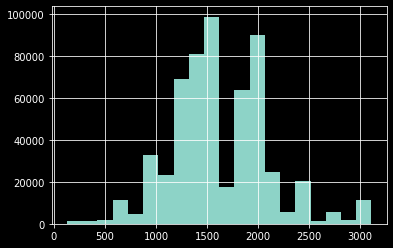

In [35]:
df['engine_capacity_cc'].hist(bins=20)
plt.style.use('dark_background')

I can accept this distribution and will now check and handle their nulls

In [36]:
#check values of 'engine_capacity_cc'
df['engine_capacity_cc'].describe()

count    569057.000000
mean       1633.351432
std         473.765085
min         128.000000
25%        1299.000000
50%        1598.000000
75%        1968.000000
max        3110.000000
Name: engine_capacity_cc, dtype: float64

In [37]:
df['engine_capacity_cc'].mean()

1633.3514322818276

Going to round this mean value

In [38]:
df['engine_capacity_cc'].fillna(1652, inplace=True)

Note: After doing the above null fixes, propulsion_code dropped from having 10% null values to 0. (see below). I will continue on and fix lsoa_of_accident_location then drop the rest of the null values with are all <5%.

In [39]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

lsoa_of_accident_location                      5.902045
2nd_road_number                                1.317618
make                                           0.063087
pedestrian_crossing-human_control              0.005448
pedestrian_crossing-physical_facilities        0.005096
time                                           0.003866
vehicle_locationrestricted_lane                0.001406
speed_limit                                    0.001230
did_police_officer_attend_scene_of_accident    0.000176
date                                           0.000000
accident_severity                              0.000000
road_type                                      0.000000
road_surface_conditions                        0.000000
police_force                                   0.000000
1st_road_class                                 0.000000
1st_road_number                                0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0

#### lsoa_of_accident_location

In [40]:
# #lsoa_of_accident_location
df['lsoa_of_accident_location'].value_counts()

E01032739    440
E01004736    412
E01000004    410
E01018648    303
E01004689    261
E01002444    231
E01030458    229
E01011365    213
E01016012    203
E01012851    192
E01024335    188
E01010521    185
E01011107    184
E01007913    178
E01023732    176
E01008440    176
E01013607    176
E01009200    175
E01016952    173
E01022677    173
E01031587    171
E01031583    171
E01032740    170
E01023584    168
E01008397    167
E01007611    166
E01003482    165
E01018337    164
E01005131    163
E01024721    162
            ... 
E01020417      1
E01001776      1
E01001842      1
E01005410      1
E01010078      1
E01032493      1
E01024642      1
E01013208      1
E01029822      1
E01030386      1
E01014887      1
E01028665      1
E01012928      1
E01030956      1
E01028815      1
E01033056      1
E01026820      1
E01014938      1
E01001967      1
E01018642      1
E01018682      1
E01024749      1
E01031616      1
W01000170      1
W01000305      1
E01003999      1
E01012436      1
E01021050     

In [41]:
df['lsoa_of_accident_location'].describe()

count        535471
unique        33936
top       E01032739
freq            440
Name: lsoa_of_accident_location, dtype: object

With 35061 unique variable and a high count amount the top variables I am deciding to do ffill again. 

In [42]:
df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)

In [43]:
#### Check nulls for again
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

2nd_road_number                                1.317618
make                                           0.063087
pedestrian_crossing-human_control              0.005448
pedestrian_crossing-physical_facilities        0.005096
time                                           0.003866
vehicle_locationrestricted_lane                0.001406
speed_limit                                    0.001230
did_police_officer_attend_scene_of_accident    0.000176
carriageway_hazards                            0.000000
longitude                                      0.000000
road_type                                      0.000000
road_surface_conditions                        0.000000
police_force                                   0.000000
1st_road_class                                 0.000000
1st_road_number                                0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
lsoa_of_accident_location                      0

Dropping the remaining nulls that are <1%.

In [44]:
#drop the remaining nulls that are <1%
df.dropna(inplace=True)

#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

x1st_point_of_impact                           0.0
speed_limit                                    0.0
road_type                                      0.0
road_surface_conditions                        0.0
police_force                                   0.0
pedestrian_crossing-physical_facilities        0.0
pedestrian_crossing-human_control              0.0
number_of_vehicles                             0.0
number_of_casualties                           0.0
lsoa_of_accident_location                      0.0
longitude                                      0.0
local_authority_highway                        0.0
local_authority_district                       0.0
light_conditions                               0.0
latitude                                       0.0
junction_detail                                0.0
junction_control                               0.0
did_police_officer_attend_scene_of_accident    0.0
day_of_week                                    0.0
date                           

In [45]:
df.shape

(561135, 53)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561135 entries, 0 to 720279
Data columns (total 53 columns):
accident_index                                 561135 non-null object
1st_road_class                                 561135 non-null object
1st_road_number                                561135 non-null object
2nd_road_number                                561135 non-null object
accident_severity                              561135 non-null object
carriageway_hazards                            561135 non-null object
date                                           561135 non-null datetime64[ns]
day_of_week                                    561135 non-null object
did_police_officer_attend_scene_of_accident    561135 non-null object
junction_control                               561135 non-null object
junction_detail                                561135 non-null object
latitude                                       561135 non-null float64
light_conditions                        

#### More outliers, categorizing, and other cleanup

In [47]:
#detecting outliers of numerical columns (all floats/ints excluding lat/long and year)

df_num = df[['engine_capacity_cc','number_of_casualties','number_of_vehicles','speed_limit']]


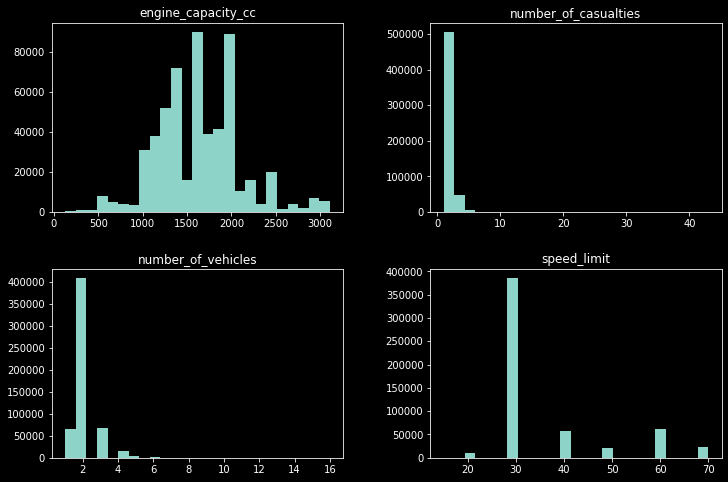

In [48]:
df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')

Column 'speed_limit' seems ok and was previously altered 'engine_capacity_cc'. However, 'number_of_casualties', and 'number_of_vehicles',will be evaluated. 

In [49]:
# #number_of_casualties
df['number_of_casualties'].value_counts()

1     391938
2     113736
3      35451
4      12511
5       4621
6       1739
7        599
8        243
9        146
10        52
11        29
12        28
13        15
16        10
14         4
15         3
17         3
24         2
21         2
19         1
22         1
43         1
Name: number_of_casualties, dtype: int64

In [50]:
#create casualities grouping

def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"
  
    

In [51]:
#apply function   
df['number_of_casualties']= df['number_of_casualties'].apply(casualities)

In [52]:
#number_of_casualties
df['number_of_casualties'].value_counts()

1     391938
2     113736
3      35451
4      12511
5+      7499
Name: number_of_casualties, dtype: int64

In [53]:
df['propulsion_code'].value_counts()/df.shape[0]*100

Petrol                 60.540155
Heavy oil              38.544913
Hybrid electric         0.782699
Gas/Bi-fuel             0.094808
Petrol/Gas (LPG)        0.021207
Electric diesel         0.013188
Gas                     0.002317
New fuel technology     0.000356
Gas Diesel              0.000178
Fuel cells              0.000178
Name: propulsion_code, dtype: float64

In [54]:
#Clean the values for Propulsion Code. 
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [55]:
df['propulsion_code'].value_counts()/df.shape[0]*100

Petrol                 60.542472
Heavy oil              38.544913
Hybrid electric         0.782699
Bio-fuel                0.094808
LPG Petrol              0.021207
Electric diesel         0.013188
New fuel technology     0.000356
Diesel                  0.000178
Fuel cells              0.000178
Name: propulsion_code, dtype: float64

### Feature Manipulation Creation and Engineering

In [56]:
# #unique values
df.nunique().sort_values(ascending=False)

accident_index                                 412838
longitude                                      356283
latitude                                       346962
lsoa_of_accident_location                       33895
model                                           25688
2nd_road_number                                  5781
1st_road_number                                  5088
date                                             2557
time                                             1439
engine_capacity_cc                               1023
local_authority_district                          380
make                                              226
local_authority_highway                           207
police_force                                       51
vehicle_manoeuvre                                  18
vehicle_type                                       16
number_of_vehicles                                 15
vehicle_reference                                  15
hit_object_in_carriageway   

In [57]:
df['date'] = pd.to_datetime(df['date'])

In [58]:
df['month'] = df ['date'].apply(lambda time: time.month)

In [59]:
#creating a weekend feature that includes Friday-Sunday
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [225]:
#create time of day feature with Morning Rush, Day, Noon Rush, Afternoon, After Work Rush, Night

#time of day dictionary
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [61]:
#pull time data and create hour column
df['hour'] = df['time'].str[0:2]
 
#convert to numeric    
df['hour'] =  pd.to_numeric(df['hour'])

#convert to integer
df['hour'] = df['hour'].astype('int')

In [228]:
#create time_of_day grouping

def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"
    

In [229]:
#apply function   
#time of day function
df['time_of_day']= df['hour'].apply(daygroup)   

In [64]:
df[['weekend','day_of_week','time', 'time_of_day']].tail(10)

weekend day_of_week   time time_of_day
720270        0   Wednesday  08:45           1
720271        0   Wednesday  08:45           1
720272        0     Tuesday  18:12           6
720273        1      Sunday  11:00           2
720274        1      Sunday  11:00           2
720275        0      Monday  16:32           5
720276        0      Monday  16:32           5
720277        1      Friday  06:45           1
720278        0     Tuesday  16:45           5
720279        0     Tuesday  16:45           5

In [65]:
#vehicle_type
df['vehicle_type'].value_counts()/df.shape[0]*100

Car                                      86.052020
Van / Goods 3.5 tonnes mgw or under       5.481212
Motorcycle over 500cc                     3.999929
Taxi/Private hire car                     2.932628
Motorcycle over 125cc and up to 500cc     0.881428
Motorcycle 125cc and under                0.178567
Minibus (8 - 16 passenger seats)          0.140251
Other vehicle                             0.131519
Goods over 3.5t. and under 7.5t           0.083937
Motorcycle 50cc and under                 0.043840
Bus or coach (17 or more pass seats)      0.024771
Goods vehicle - unknown weight            0.015326
Goods 7.5 tonnes mgw and over             0.013188
Motorcycle - unknown cc                   0.013009
Agricultural vehicle                      0.007128
Electric motorcycle                       0.001247
Name: vehicle_type, dtype: float64

I want to condense the vehicle type variables. 

In [123]:
#motorcycles
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Motorcycle over 125cc and up to 500cc",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", 
                                                value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Electric motorcycle", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", 
                                                        value="Motorcycle")


#Goods_vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Van / Goods 3.5 tonnes mgw or under", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods vehicle - unknown weight", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", 
                                                        value="Goods Vehicle")

#car
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", 
                                                        value="Car")


#bus
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", 
                                                        value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Bus or coach (17 or more pass seats)", 
                                                        value="Bus")

#other vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", 
                                                        value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", 
                                                        value="Other Vehicle")


In [124]:
#vehicle_type
df['vehicle_type'].value_counts()/df.shape[0]*100

Car              88.984647
Goods Vehicle     5.593663
Motorcycle        5.118020
Bus               0.165023
Other Vehicle     0.138648
Name: vehicle_type, dtype: float64

Create more condense groups for age band of driver in order to deal with some potential outliers.

In [68]:
#age_band_of_driver 
df['age_band_of_driver'].value_counts()/df.shape[0]*100

26 - 35    22.598662
36 - 45    20.728345
46 - 55    17.551213
21 - 25    12.208827
56 - 65    10.373796
16 - 20     7.145696
66 - 75     5.624850
Over 75     3.757028
11 - 15     0.011049
6 - 10      0.000356
0 - 5       0.000178
Name: age_band_of_driver, dtype: float64

In [69]:
#I did this before hand because as "Over 75", it wouldnt convert in the codes below
df['age_band_of_driver']=df['age_band_of_driver'].replace("Over 75","75-100")

In [70]:
age1 = ["0 - 5", "6 - 10", "11 - 15"]
age2 = ["16 - 20","21 - 25"]
age3 = ["26 - 35","36 - 45"]
age4 = ["46 - 55", "56 - 65"]
age5 = ["66 - 75", "75-100"]

In [71]:
#over 75 wouldnt work in the string so I did it separately
for (row, col) in df.iterrows():

    if str.lower(col.age_band_of_driver) in age1:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='Under 16', inplace=True)

    if str.lower(col.age_band_of_driver) in age2:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='16-25', inplace=True)
    
    if str.lower(col.age_band_of_driver) in age3:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='26-45', inplace=True)
    if str.lower(col.age_band_of_driver) in age4:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='46-65', inplace=True)
    if str.lower(col.age_band_of_driver) in age5:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='Over 65', inplace=True)

In [72]:
#age_band_of_driver
print("Distinct responses for age_band_of_driver:\n", set(df['age_band_of_driver']))

Distinct responses for age_band_of_driver:
 {'Over 65', 'Under 16', '46-65', '26-45', '16-25'}


In [73]:
# number_of_vehicles
df['number_of_vehicles'].value_counts()/df.shape[0]*100

2     72.944835
3     11.924403
1     11.570121
4      2.706122
5      0.582747
6      0.167874
7      0.059166
8      0.021385
11     0.005881
9      0.005881
10     0.004277
14     0.002317
13     0.002139
16     0.001782
12     0.001069
Name: number_of_vehicles, dtype: float64

In [74]:
#group number_of_vehicles

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  
#apply function   
df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)

In [75]:
# number_of_vehicles
df['number_of_vehicles'].value_counts()/df.shape[0]*100

2     72.944835
3     11.924403
1     11.570121
4+     3.560640
Name: number_of_vehicles, dtype: float64

In [76]:
df['number_of_vehicles'].dtypes

dtype('O')

In [77]:
df['number_of_vehicles']=df['number_of_vehicles'].astype('object')

In [78]:
#creating seasons column for ML

#creating season column

def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "winter"
    elif(month == 3 or month == 4 or month == 5):
       return "spring"
    elif(month == 6 or month== 7 or month == 8):
       return "summer"
    else:
       return "fall"

df['season'] = df['month'].apply(getSeason)

In [79]:
# number_of_vehicles
df['season'].value_counts()/df.shape[0]*100

fall      27.065858
summer    25.502241
spring    24.624912
winter    22.806989
Name: season, dtype: float64

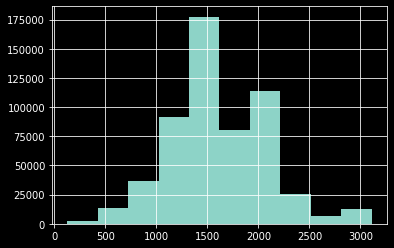

In [80]:
#go back to engine capacity CC and crete groups
df.engine_capacity_cc.hist()

In [81]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [82]:
df.engine_capacity_cc_size.value_counts()

medium engine cc    259881
small engine cc     231031
large engine cc      70223
Name: engine_capacity_cc_size, dtype: int64

In [83]:
#Put above pickle in next full run
#create new column for Machine Learning and Visualization with Not Serious and Serious
df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight", 
                                                                value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",
                                                                value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal", 
                                                                value="Serious")
df.shape

(561135, 60)

In [84]:
df.accident_seriousness.value_counts()

Not Serious    492804
Serious         68331
Name: accident_seriousness, dtype: int64

In [85]:
#pickling everything to speed up restarting
df.to_pickle("df.pkl")

In [16]:
#import pickled file
df = pd.read_pickle("df.pkl")
df.head()

accident_index 1st_road_class 1st_road_number 2nd_road_number  \
0  201001BS70003              B             302               0   
1  201001BS70004              A             402            4204   
3  201001BS70007   Unclassified               0               0   
4  201001BS70007   Unclassified               0               0   
5  201001BS70008              A            3217            3220   

  accident_severity carriageway_hazards       date day_of_week  \
0            Slight                None 2010-01-11      Monday   
1            Slight                None 2010-01-11      Monday   
3            Slight                None 2010-01-02    Saturday   
4            Slight                None 2010-01-02    Saturday   
5            Slight                None 2010-01-04      Monday   

  did_police_officer_attend_scene_of_accident          junction_control  ...  \
0                                           1  Give way or uncontrolled  ...   
1                                           1       Auto traffic signal  ...   
3                                           1  Give way or uncontrolled  ...   
4                                           1  Give way or uncontrolled  ...   
5                                           1       Auto traffic signal  ...   

    vehicle_type  was_vehicle_left_hand_drive x1st_point_of_impact month  \
0  Goods Vehicle                           No                Front     1   
1            Car                           No                Front     1   
3            Car                           No             Nearside     1   
4            Car                           No                Front     1   
5            Car                           No             Nearside     1   

  weekend  hour time_of_day  season engine_capacity_cc_size  \
0       0     7           1  winter         small engine cc   
1       0    18           6  winter        medium engine cc   
3       1    21           6  winter        medium engine cc   
4       1    21           6  winter         small engine cc   
5       0    20           6  winter        medium engine cc   

  accident_seriousness  
0          Not Serious  
1          Not Serious  
3          Not Serious  
4          Not Serious  
5          Not Serious  

[5 rows x 60 columns]

### General Visualizations

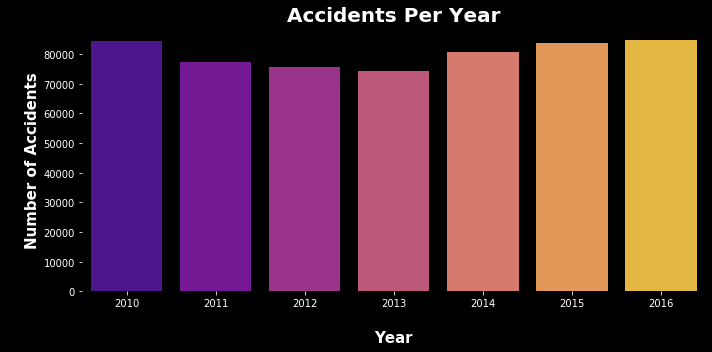

In [278]:
accidentsperyear = df.groupby(['year'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(accidentsperyear.index,accidentsperyear.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Year",fontsize=20,fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentsperyear.png')
plt.tight_layout()


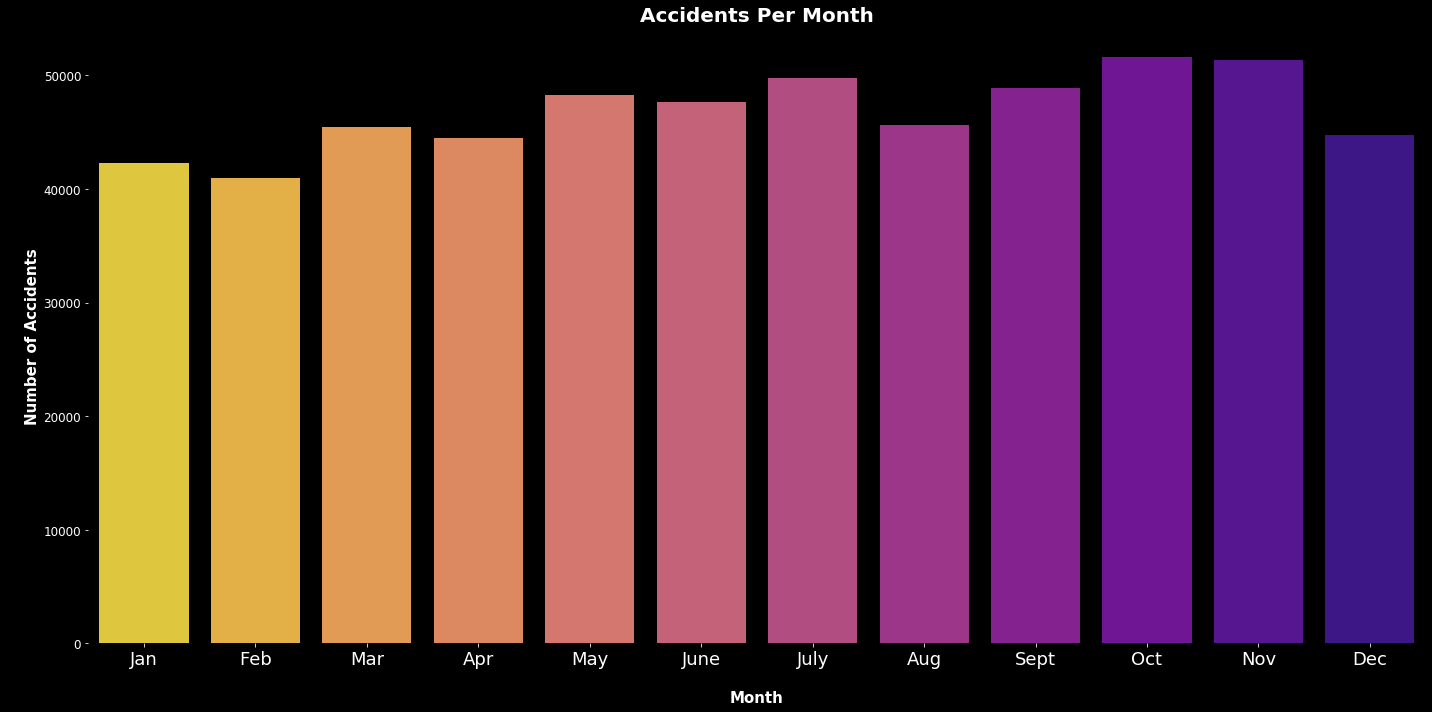

In [277]:
accidentspermonth = df.groupby(['month'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(accidentspermonth.index,accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Accidents Per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentspermonth.png')
plt.tight_layout()


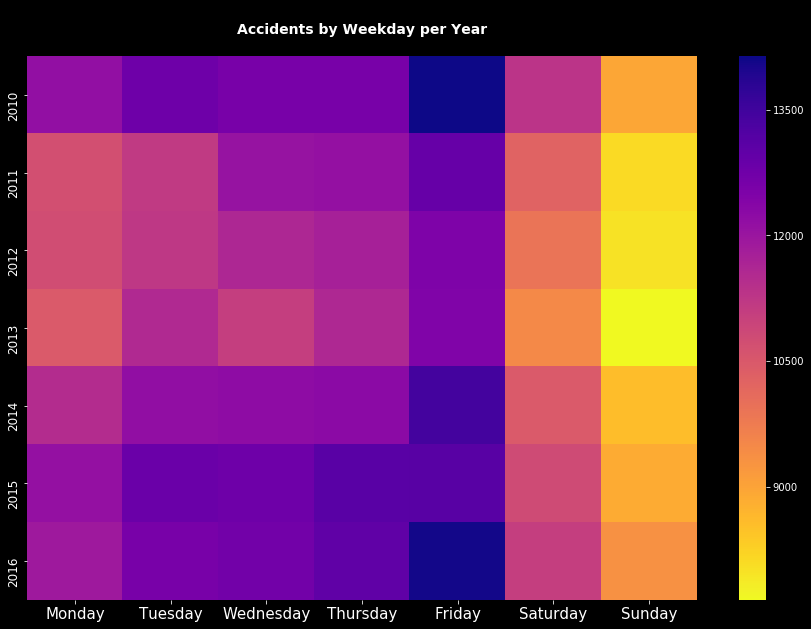

In [276]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = df.groupby(['year', 'day_of_week']).size()
accweekday = accweekday.rename_axis(['year', 'day_of_week'])\
                               .unstack('day_of_week')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdayperyear.png')
plt.show()

Fridays are the day of the week where the most accidents occur.

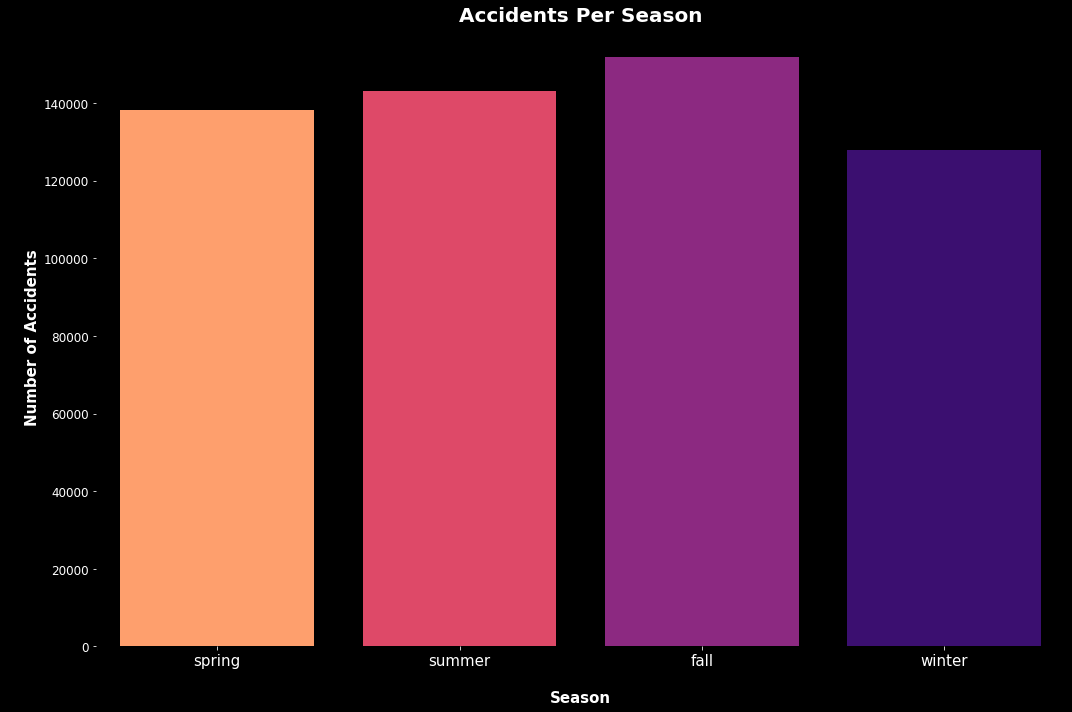

In [273]:
accidentsperseason = df.groupby(['season'])['accident_index'].count()
seaord=['spring', 'summer', 'fall','winter']
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(accidentsperseason.index,accidentsperseason.values, order=seaord, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentsperseason.png')


In [17]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"After Work Rush (16-18)", "Evening (18-22)", "Night (22-6)"

timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
df['time_of_day']=df['time_of_day'].map(timeofdaygroups)

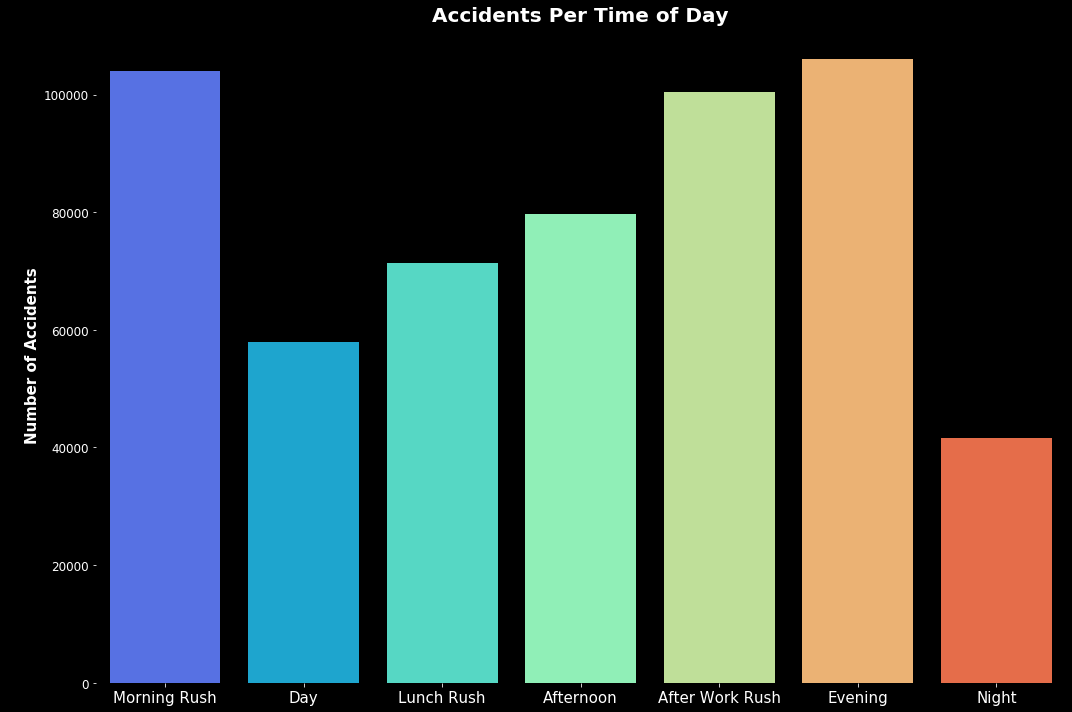

In [267]:
accidentspertod = df.groupby(['time_of_day'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(accidentspertod.index,accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentspertod.png')


### Accident Forecasting with Tableau

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1572176706313' style='position: relative'><noscript><a href='https:&#47;&#47;github.com&#47;GenTaylor&#47;Traffic-Accident-Analysis'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ac&#47;AccidentForecasting&#47;AccidentForecasting&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AccidentForecasting&#47;AccidentForecasting' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ac&#47;AccidentForecasting&#47;AccidentForecasting&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572176706313');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

According to the forecasting above, traffic accidents will be slightly lower than years before but following similar trends throughout the months. 

Below is a screenshot of the above forecasting. I put this here just in case there is trouble viewing it. If you would like to view the actual worksheet for it, please click [here](https://public.tableau.com/profile/genesis.taylor#!/vizhome/AccidentForecasting/AccidentForecasting).

![timeforecastingscreenshot.PNG](https://raw.githubusercontent.com/GenTaylor/Traffic-Accident-Analysis/master/timeforecastingscreenshot.PNG)

### Correlations
For correlation I used both Pearson and Spearman just in case there would be discrepancies. The order may have slightly varied but the "highest" correlated remained the same.

In [7]:
#correlation by accident severity pearson
corrdf=df.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=df.columns)
corr=corrdf.corr()['accident_seriousness']
corr[np.argsort(corr,axis=0)[::-1]]

accident_seriousness                           1.000000
vehicle_type                                   0.133941
x1st_point_of_impact                           0.076099
speed_limit                                    0.065554
skidding_and_overturning                       0.059322
vehicle_leaving_carriageway                    0.058977
sex_of_driver                                  0.054505
lsoa_of_accident_location                      0.048548
number_of_casualties                           0.043294
age_band_of_driver                             0.039851
junction_control                               0.037966
hit_object_off_carriageway                     0.036040
time_of_day                                    0.026101
model                                          0.022808
accident_index                                 0.022391
junction_location                              0.019548
road_type                                      0.019443
engine_capacity_cc_size                        0

In [8]:
corr_spear=corrdf.corr(method='spearman')['accident_seriousness']
corr_spear[np.argsort(corr_spear,axis=0)[::-1]]

accident_seriousness                           1.000000
vehicle_type                                   0.114374
vehicle_leaving_carriageway                    0.071079
x1st_point_of_impact                           0.067697
speed_limit                                    0.062779
skidding_and_overturning                       0.059746
sex_of_driver                                  0.054629
lsoa_of_accident_location                      0.048538
junction_control                               0.041690
age_band_of_driver                             0.037758
hit_object_off_carriageway                     0.034738
road_type                                      0.028215
time_of_day                                    0.026387
junction_location                              0.024224
junction_detail                                0.024051
accident_index                                 0.022667
number_of_casualties                           0.022535
engine_capacity_cc_size                        0

Looking at this I wanted to visualize some of the higher pos/negative correlations against accident severity.

#### Chi-Squared Test

Before these visualizations were done, I wanted to be sure that the visualizations were of some importance to accident_seriousness. For this, the chi-squared test was used.

In [12]:
"""chisquare algorithm from 
http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python """

    
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The column {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The column {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, 
                                       index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['accident_index', '1st_road_class', '1st_road_number','2nd_road_number', 
               'carriageway_hazards', 'date', 'day_of_week', 
               'did_police_officer_attend_scene_of_accident','junction_control', 
               'junction_detail', 'latitude', 'light_conditions', 'local_authority_district',
               'local_authority_highway', 'longitude','lsoa_of_accident_location', 
               'number_of_casualties', 'number_of_vehicles', 'pedestrian_crossing-human_control',
               'pedestrian_crossing-physical_facilities', 'police_force','road_surface_conditions', 
               'road_type', 'special_conditions_at_site', 'speed_limit', 'time', 
               'urban_or_rural_area', 'weather_conditions', 'year', 'inscotland', 
               'age_band_of_driver', 'age_of_vehicle', 'driver_home_area_type', 
               'driver_imd_decile', 'engine_capacity_cc','hit_object_in_carriageway', 
               'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 
               'make', 'model','propulsion_code', 'sex_of_driver', 'skidding_and_overturning',
               'towing_and_articulation', 'vehicle_leaving_carriageway',
               'vehicle_locationrestricted_lane', 'vehicle_manoeuvre','vehicle_reference',
               'vehicle_type', 'was_vehicle_left_hand_drive', 'x1st_point_of_impact', 'month',
               'weekend', 'hour', 'time_of_day','season', 'engine_capacity_cc_size']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="accident_seriousness" )  

The column accident_index is IMPORTANT for Prediction
The column 1st_road_class is IMPORTANT for Prediction
The column 1st_road_number is IMPORTANT for Prediction
The column 2nd_road_number is IMPORTANT for Prediction
The column carriageway_hazards is IMPORTANT for Prediction
The column date is IMPORTANT for Prediction
The column day_of_week is IMPORTANT for Prediction
The column did_police_officer_attend_scene_of_accident is IMPORTANT for Prediction
The column junction_control is IMPORTANT for Prediction
The column junction_detail is IMPORTANT for Prediction
The column latitude is IMPORTANT for Prediction
The column light_conditions is IMPORTANT for Prediction
The column local_authority_district is IMPORTANT for Prediction
The column local_authority_highway is IMPORTANT for Prediction
The column longitude is IMPORTANT for Prediction
The column lsoa_of_accident_location is IMPORTANT for Prediction
The column number_of_casualties is IMPORTANT for Prediction
The column number_of_vehicles

## Visualizations In Relation to Accident Seriousness

#### Method:
For my visualizations I have decided to use some of the features with the highest correlations to accident_seriousness:
* did_police_officer_attend_scene_of_accident 
* x1st_point_of_impact 
* number_of_vehicles  
* speed_limit
* urban_or_rural_area  
* skidding_and_overturning 
* vehicle_leaving_carriageway 
* sex_of_driver     
* vehicle_type  
* vehicle_manoeuvre 
* engine_capacity_cc 
* number_of_casualties                           
* driver_home_area_type  
* age_band_of_driver  
* junction_control  
* hit_object_off_carriageway
* hit_object_in_carriageway 
* driver_imd_decile *
* junction_detail *
* junction_location *
* propulsion_code *
* year *
***
Note: The columns used were selected because of the absolute value of their correlation in relation to accident_seriousness

*columns added after correlation was done after undersampling

For visual reasons, two separate dataframes were created, for not serious and serious accidents. I wanted to better scale the data and for me, this was the simplest way of doing so.

In [31]:
#dataframe where accidents are Slight
not_serious = df[(df['accident_seriousness']=="Not Serious")]
print("Not Serious Group Shape:", not_serious.shape)

not_serious.accident_seriousness.value_counts()

Not Serious Group Shape: (492804, 59)


Not Serious    492804
Name: accident_seriousness, dtype: int64

In [32]:
#dataframe where accidents are serious
serious= df[(df['accident_seriousness']=="Serious")]

print("Serious Group Shape:", serious.shape)
serious.accident_seriousness.value_counts()

Serious Group Shape: (68331, 59)


Serious    68331
Name: accident_seriousness, dtype: int64

In [33]:
#map 1, 2, 3 in did_police_officer_attend_scene_of_accident with Yes, No,Self-reported
policeattend = {1: "Yes", 2:"No", 3:"Self-Reported"}
not_serious['did_police_officer_attend_scene_of_accident']=not_serious['did_police_officer_attend_scene_of_accident'].map(policeattend)
df['did_police_officer_attend_scene_of_accident']=df['did_police_officer_attend_scene_of_accident'].map(policeattend)
serious['did_police_officer_attend_scene_of_accident']=serious['did_police_officer_attend_scene_of_accident'].map(policeattend)


In [34]:
imddecile = {1:"Most deprived 10%", 2:"More deprived 10-20%", 3:"More deprived 20-30%", 
             4:"More deprived 30-40%", 5:"More deprived 40-50%", 6:"Less deprived 40-50%", 
             7:"Less deprived 30-40%", 8:"Less deprived 20-30%", 9:"Less deprived 10-20%", 
             10:"Least deprived 10%"}

not_serious['driver_imd_decile']=not_serious['driver_imd_decile'].map(imddecile)
df['driver_imd_decile']=df['driver_imd_decile'].map(imddecile)
serious['driver_imd_decile']=serious['driver_imd_decile'].map(imddecile)


In [35]:
#setups for adding frequencies to visualizations
dftotal= float(len(df))
nstotal= float(len(not_serious))
setotal= float(len(serious))


#### Did Police Officer Attend Scene Of Accident

The below plots will look into if police officers attended the scene of an accident. 

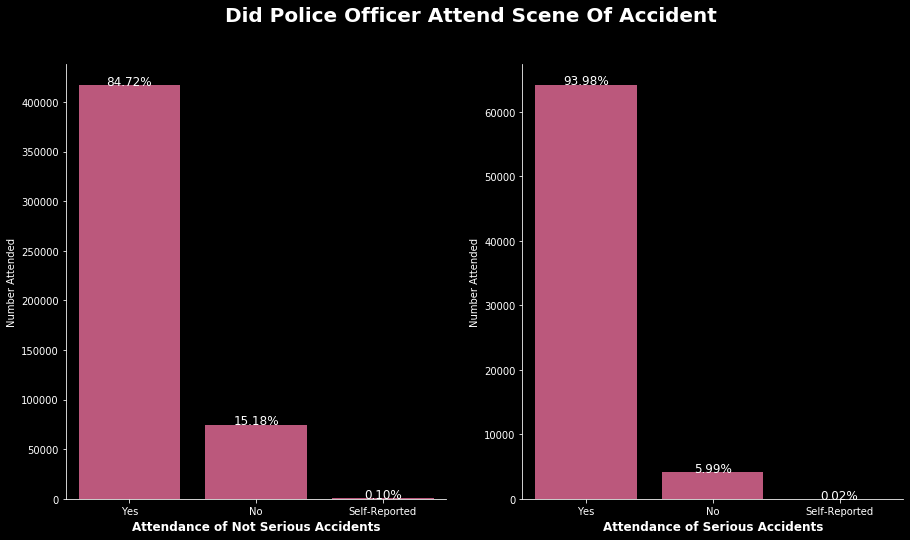

In [40]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 = sns.countplot( "did_police_officer_attend_scene_of_accident", hue="accident_seriousness", 
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("did_police_officer_attend_scene_of_accident", hue="accident_seriousness",  
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Did Police Officer Attend Scene Of Accident", fontsize=20, fontweight="bold")
ax1.set_xlabel('Attendance of Not Serious Accidents', fontsize=12, fontweight="bold")
ax2.set_xlabel('Attendance of Serious Accidents', fontsize=12, fontweight="bold")
ax1.set_ylabel('Number Attended')
ax2.set_ylabel('Number Attended')
ax1.get_legend().remove()
ax2.get_legend().remove()
plt.style.use('dark_background')
plt.savefig('did_police_officer_attend_scene_of_accident.png')
fig.show()


#### First Point of Impact

The below plots show the counts for the first spot in which vehicles were hit in an accident

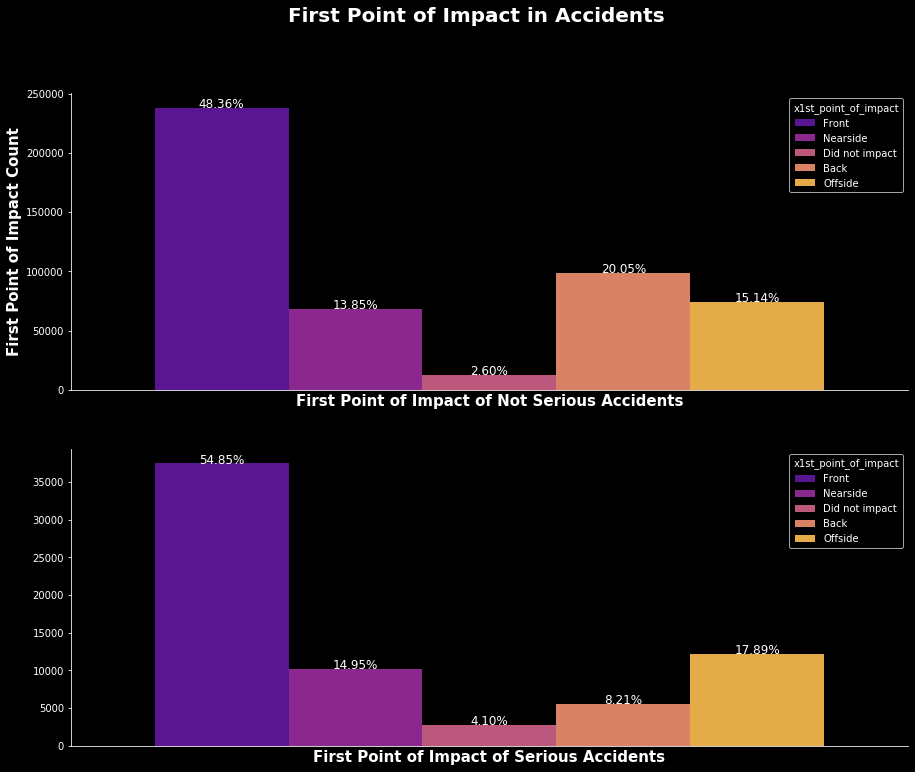

In [42]:
# First Point of Impact Vs Accident Seriousness (Not Serious)
fpoa_order =["Front", "Nearside", "Did not impact", "Back", "Offside"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness",hue="x1st_point_of_impact", hue_order=fpoa_order,  
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness",hue="x1st_point_of_impact", hue_order=fpoa_order, 
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("First Point of Impact in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('First Point of Impact of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('First Point of Impact of Serious Accidents',  fontsize=15, fontweight="bold")
ax1.set_ylabel('First Point of Impact Count', fontsize=15, fontweight="bold")
ax2.set_ylabel('')
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')
plt.savefig('x1st_point_of_impact.png')
fig.show()


#### Number of Vehicles

The below plots show the counts for number of vehicles in each accident.

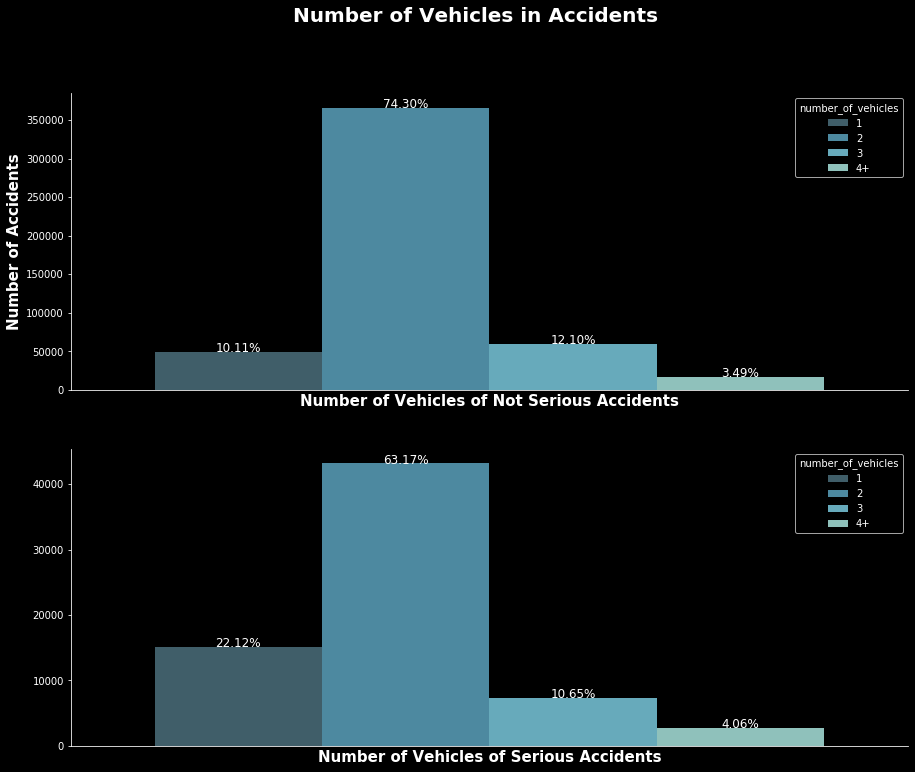

In [43]:

nov_order=["1","2", "3", "4+"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="GnBu_d", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="GnBu_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Number of Vehicles in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Number of Vehicles of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Number of Vehicles of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('number_of_vehicles.png')
fig.show()


#### Spe#### Speed Limit vs Accident Seriousness
The below graphs show the speed limit by accident in areas where the accidents occured. ed Limit vs Accident Seriousness

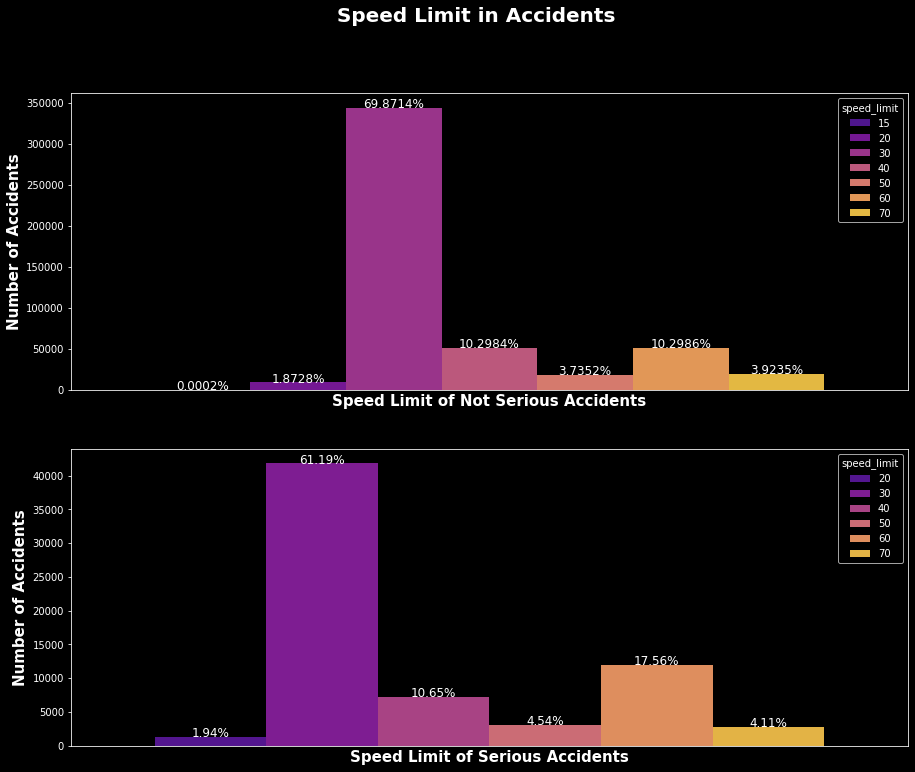

In [44]:
splt_order=[15, 20,30,40,50,60,70]
splt_order2=[20,30,40,50,60,70]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))

ax1 =sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.4f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order2,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Speed Limit in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Speed Limit of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Speed Limit of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.style.use('dark_background')
plt.savefig('speed_limit.png')
fig.show()


#### Urban  or Rural  Area vs Accident Seriousness
The graphs below show whether the accidents occured in an Urban or Rural Area.

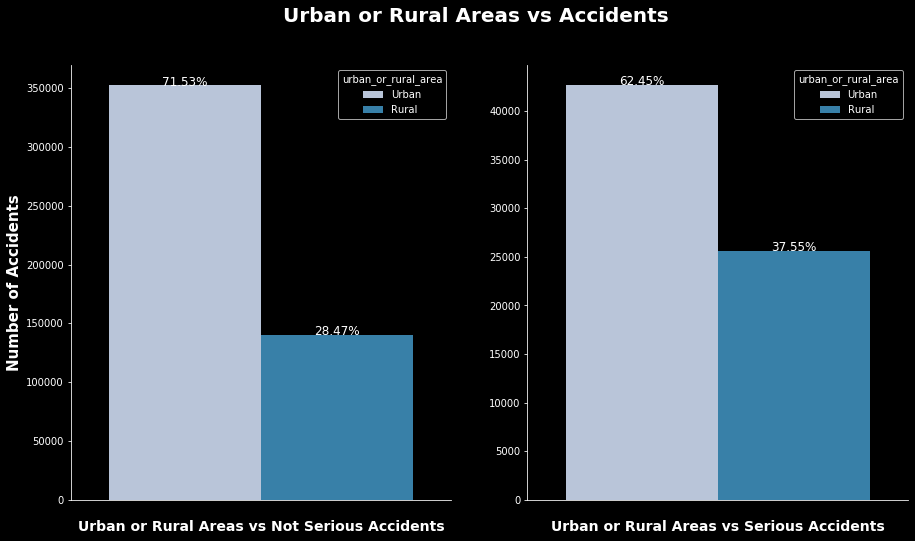

In [45]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness",  hue="urban_or_rural_area",
              palette="PuBu", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness",  hue="urban_or_rural_area",
              palette="PuBu", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Urban or Rural Areas vs Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nUrban or Rural Areas vs Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nUrban or Rural Areas vs Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('urban_or_rural_area.png')
fig.show()


#### Skidding and Overturning vs Seriousness
The below graphs show if any skidding, jackniffing, and/or overturnning occured in the acccident.

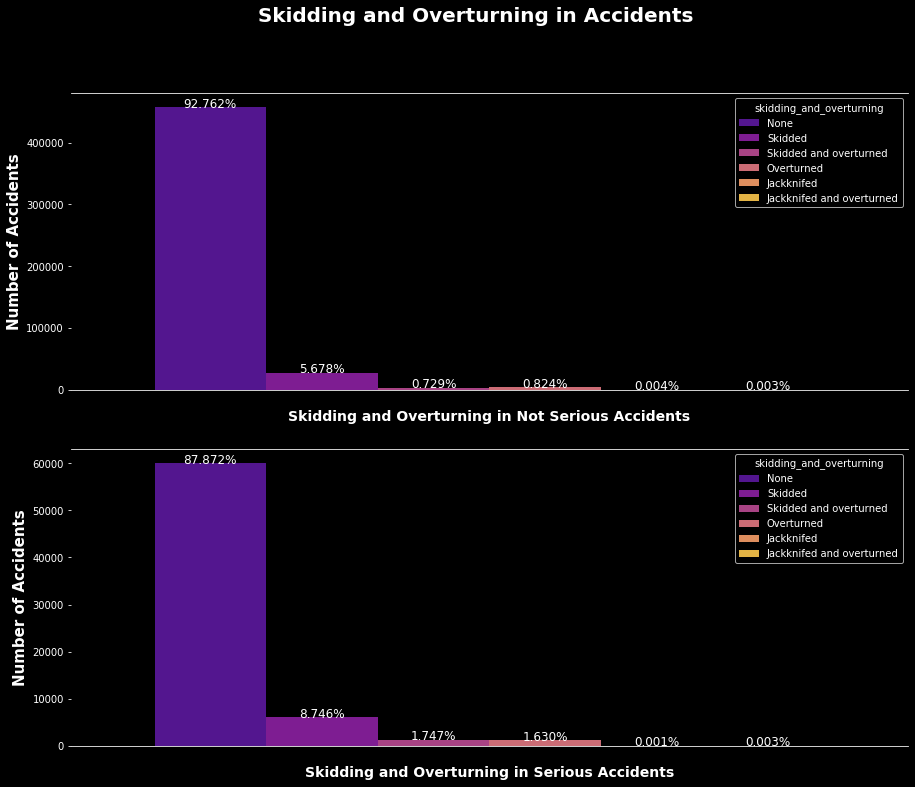

In [46]:
sao_order=["None", "Skidded", "Skidded and overturned", "Overturned", "Jackknifed", 
           "Jackknifed and overturned"]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="skidding_and_overturning", hue_order=sao_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="skidding_and_overturning", hue_order=sao_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Skidding and Overturning in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSkidding and Overturning in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSkidding and Overturning in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.style.use('dark_background')
plt.savefig('skidding_and_overturning.png')
fig.show()


#### Vehicle Leaving Carriageway vs Seriousness
The below graphs show if a vehicle left the carriageway, and if they did, where did they do so.

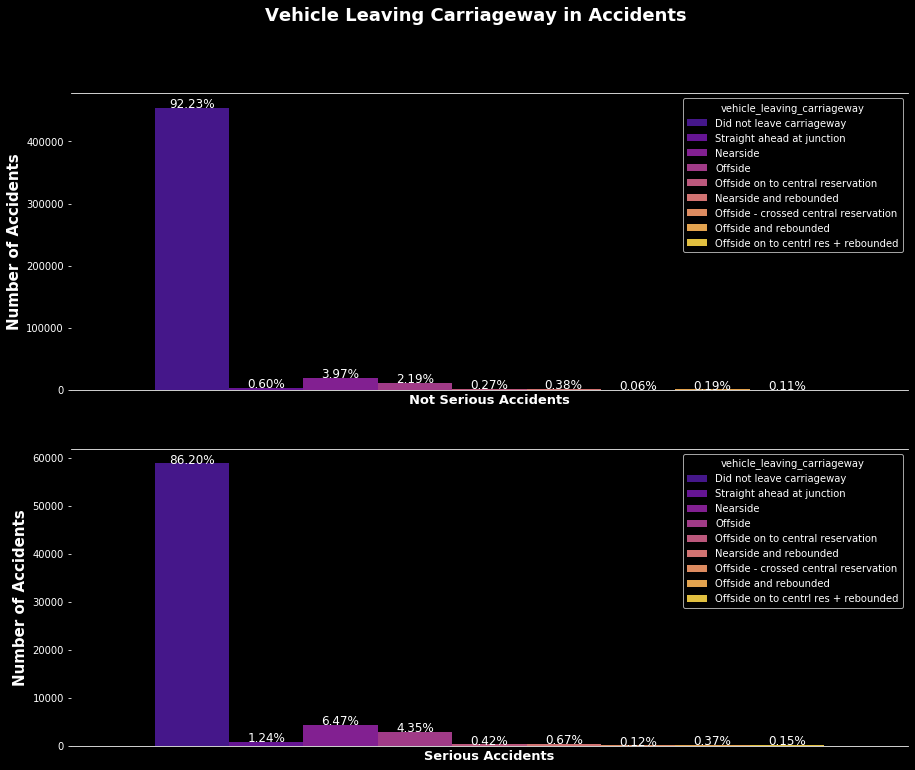

In [47]:
vlc_order=["Did not leave carriageway", "Straight ahead at junction", "Nearside", 
           "Offside", "Offside on to central reservation", "Nearside and rebounded", 
           "Offside - crossed central reservation", "Offside and rebounded", 
           "Offside on to centrl res + rebounded"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_leaving_carriageway", hue_order=vlc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_leaving_carriageway", hue_order=vlc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Leaving Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')
plt.savefig('vehicle_leaving_carriageway.png')
fig.show()



#### Sex of Driver vs Seriousness
The below graphs show the sex of the drivers in the accidents.

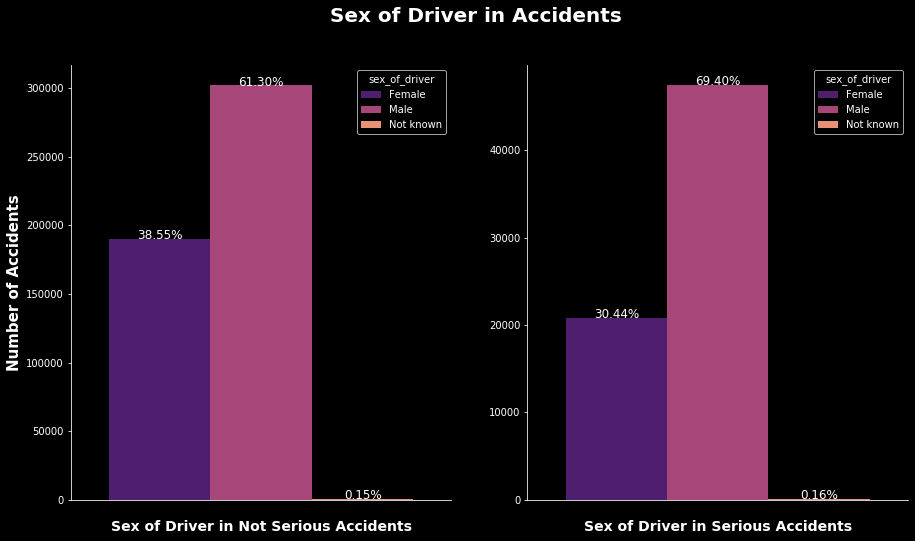

In [48]:
sod_order=["Female", "Male", "Not known"]

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Sex of Driver in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSex of Driver in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSex of Driver in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('sex_of_driver.png')
fig.show()


#### Vehicle Type vs Seriousness
The graphs below are about the number of accidents by type of vehicle.

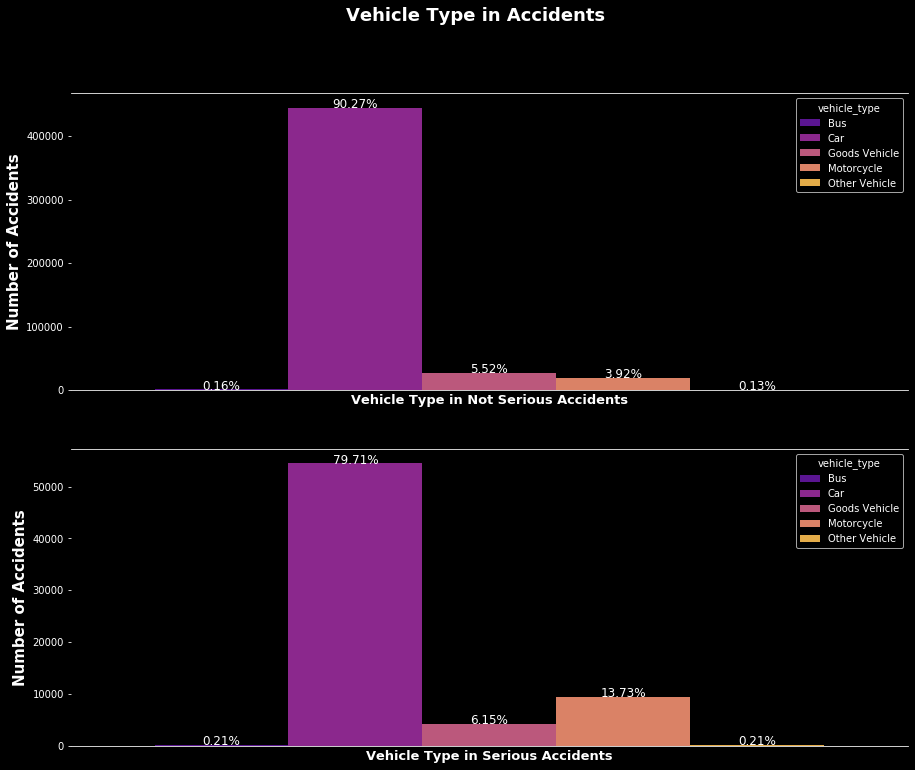

In [49]:
vt_order=['Bus', 'Car', 'Goods Vehicle', 'Motorcycle', 'Other Vehicle']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Type in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Vehicle Type in Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Vehicle Type in Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')
plt.savefig('vehicle_type.png')
fig.show()

#### Vehicle Manoeuvres

The graphs below depict the types of moves vehicles made that led to the accident. 

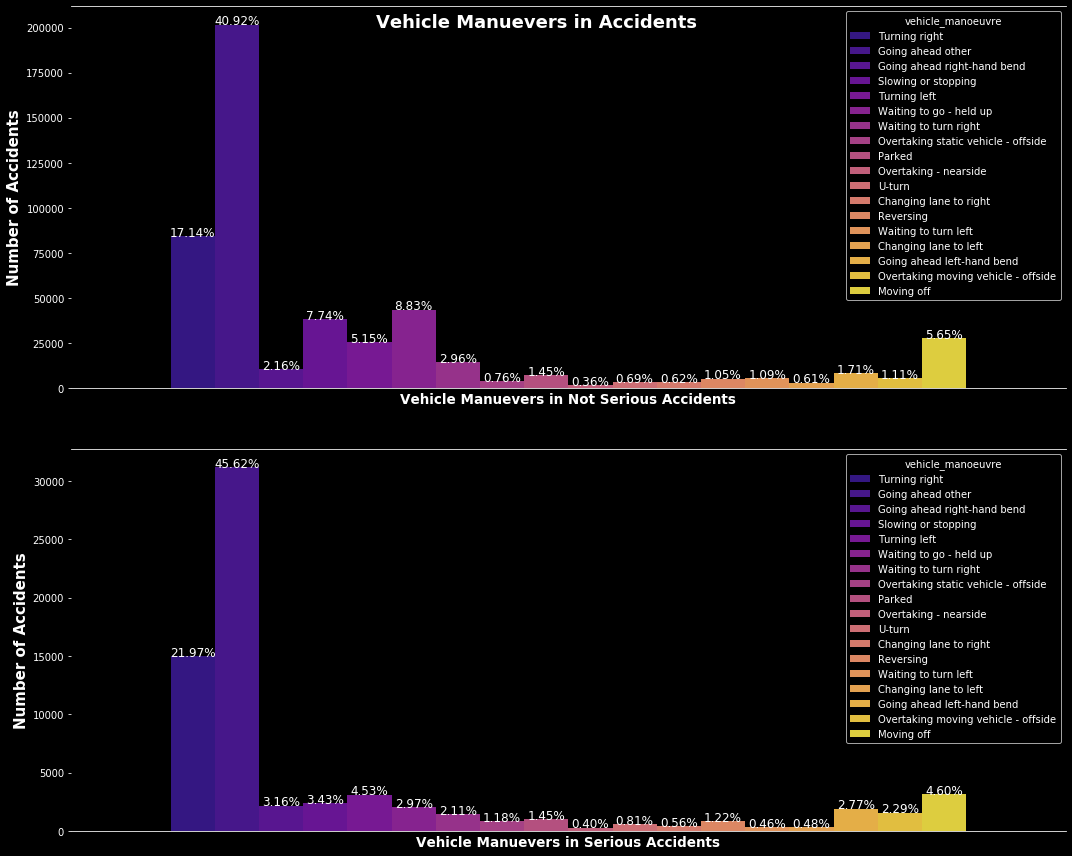

In [50]:
vm_order=['Turning right', 'Going ahead other', 'Going ahead right-hand bend',
          'Slowing or stopping', 'Turning left', 'Waiting to go - held up',
          'Waiting to turn right', 'Overtaking static vehicle - offside' ,
          'Parked', 'Overtaking - nearside', 'U-turn', 'Changing lane to right', 
          'Reversing', 'Waiting to turn left', 'Changing lane to left',
          'Going ahead left-hand bend', 'Overtaking moving vehicle - offside', 'Moving off']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="vehicle_manoeuvre",hue_order=vm_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_manoeuvre",hue_order=vm_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Vehicle Manuevers in Accidents", fontsize=18, fontweight="bold")

ax1.set_xlabel('Vehicle Manuevers in Not Serious Accidents\n\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Vehicle Manuevers in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout() # No overlap of subplots
plt.style.use('dark_background')
plt.savefig('vehicle_manoeuvre.png')
fig.show()

#### Driver Home Type Area
This area is another look at the type of area the accident occured in, whether Rural, Urban, or Small Town.

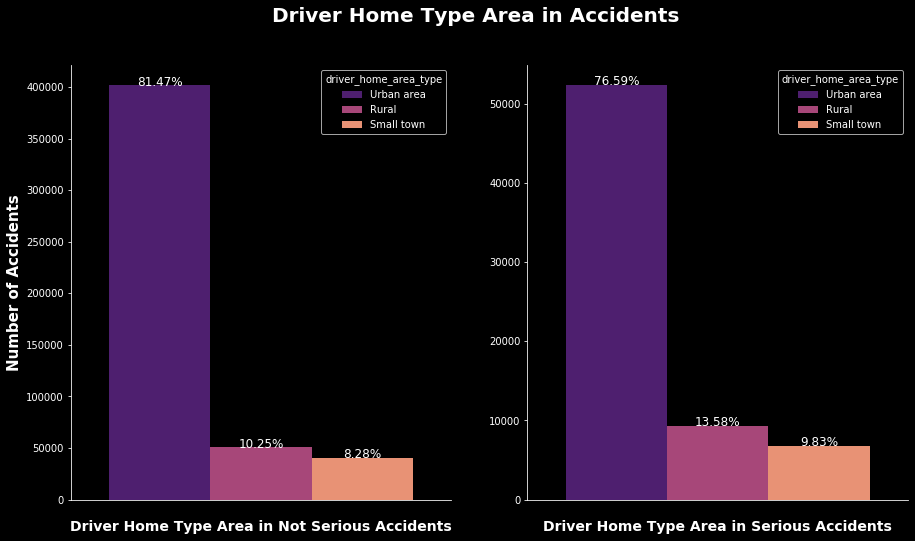

In [51]:
dhoa_order=['Urban area', 'Rural', 'Small town']

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Driver Home Type Area in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nDriver Home Type Area in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nDriver Home Type Area in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('driver_home_area.png')
fig.show()


#### Age Band of Driver
Thr graphs below show accidents by age groups of the drivers.

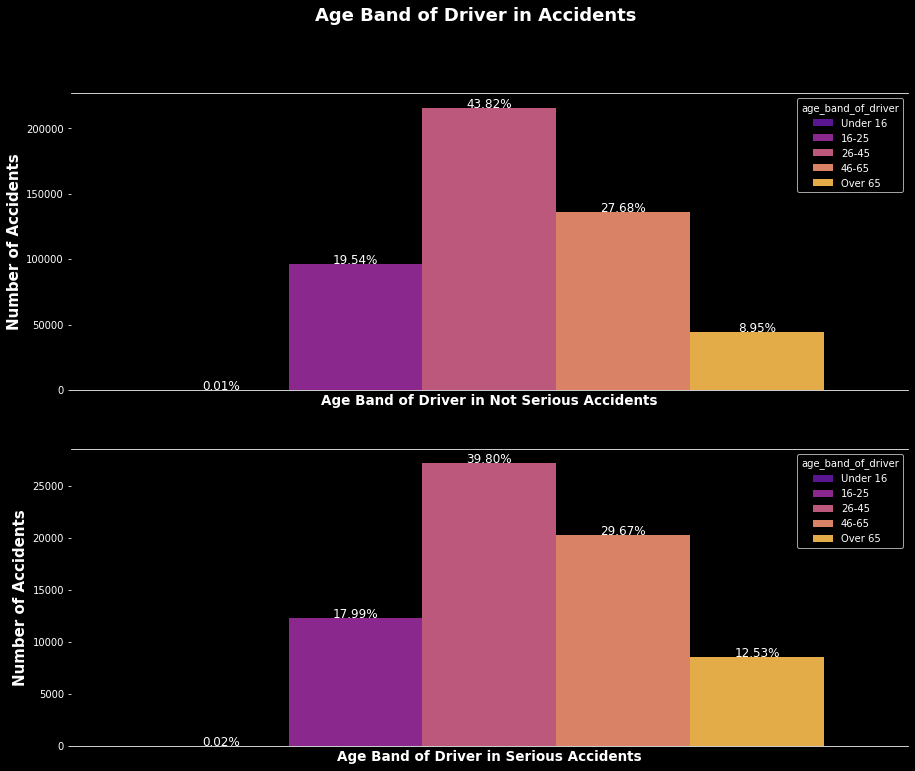

In [52]:
#age_band_of_driver
abod_order=['Under 16', '16-25', '26-45', '46-65','Over 65']


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Age Band of Driver in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Age Band of Driver in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Age Band of Driver in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('age_band_of_driver.png')
fig.show()


#### Junction Control
The following graphs show what type of traffic signs or signals were up in the accident area, if any.

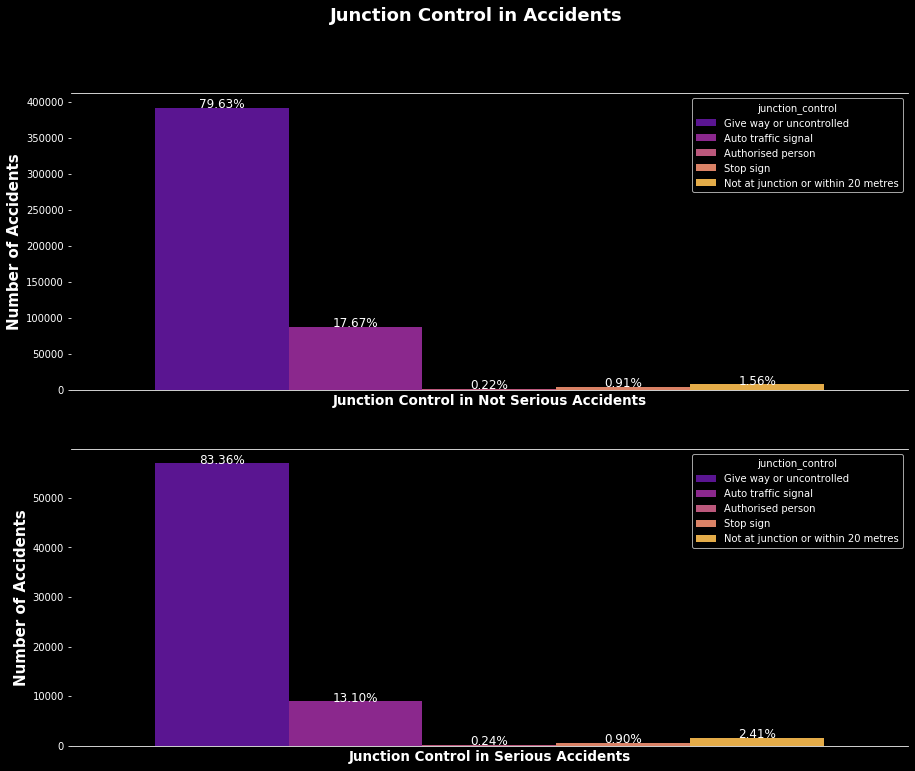

In [53]:
jc_order = ['Give way or uncontrolled', 'Auto traffic signal', 'Authorised person',
            'Stop sign','Not at junction or within 20 metres']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_control", hue_order=jc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_control", hue_order=jc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Control in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Control in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Control in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('junction_control.png')
fig.show()


#### Hit Object Off Carriageway
The following graphs show if a vehicle hit an object off of the road and what object, if they hit one during the accident.

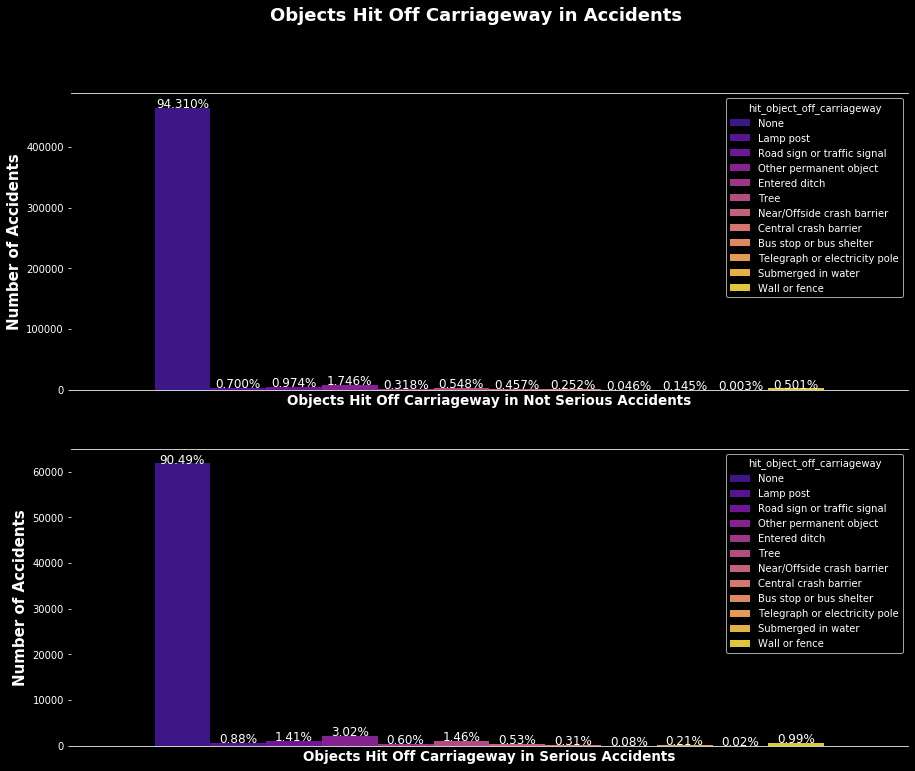

In [54]:
hooffc_order=['None', 'Lamp post', 'Road sign or traffic signal', 'Other permanent object',
              'Entered ditch', 'Tree', 'Near/Offside crash barrier','Central crash barrier',
              'Bus stop or bus shelter', 'Telegraph or electricity pole', 'Submerged in water',
              'Wall or fence']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="hit_object_off_carriageway", hue_order=hooffc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="hit_object_off_carriageway", hue_order=hooffc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Objects Hit Off Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Objects Hit Off Carriageway in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Objects Hit Off Carriageway in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('hit_object_off_carriageway.png')
fig.show()


#### Hit Object In Carriageway
The following graphs show if a vehicle hit an object on the road and what object, if they hit one during the accident.

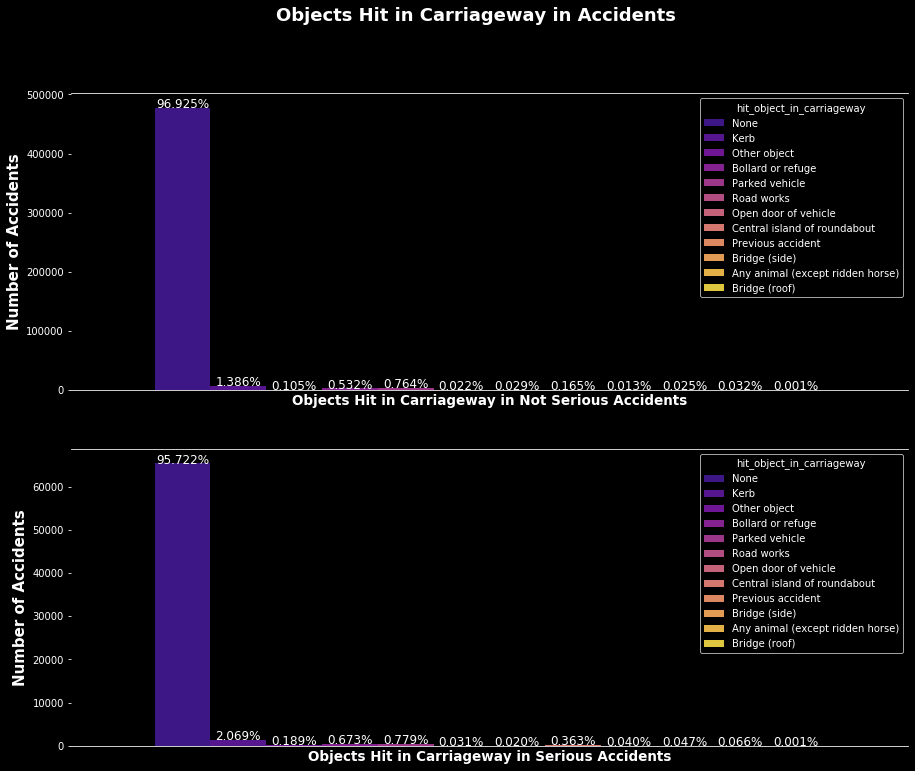

In [55]:
hoinc_order=['None', 'Kerb', 'Other object', 'Bollard or refuge', 'Parked vehicle',
             'Road works', 'Open door of vehicle', 'Central island of roundabout',
             'Previous accident', 'Bridge (side)', 'Any animal (except ridden horse)',
             'Bridge (roof)']


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="hit_object_in_carriageway", hue_order=hoinc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="hit_object_in_carriageway", hue_order=hoinc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Objects Hit in Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Objects Hit in Carriageway in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Objects Hit in Carriageway in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('hit_object_in_carriageway.png')
fig.show()


#### Driver IMD Decile
The Driver IMD Decile is the score for the deprivation of an area. The graphs below show accidents by how deprived an area was at the time of the accident. 

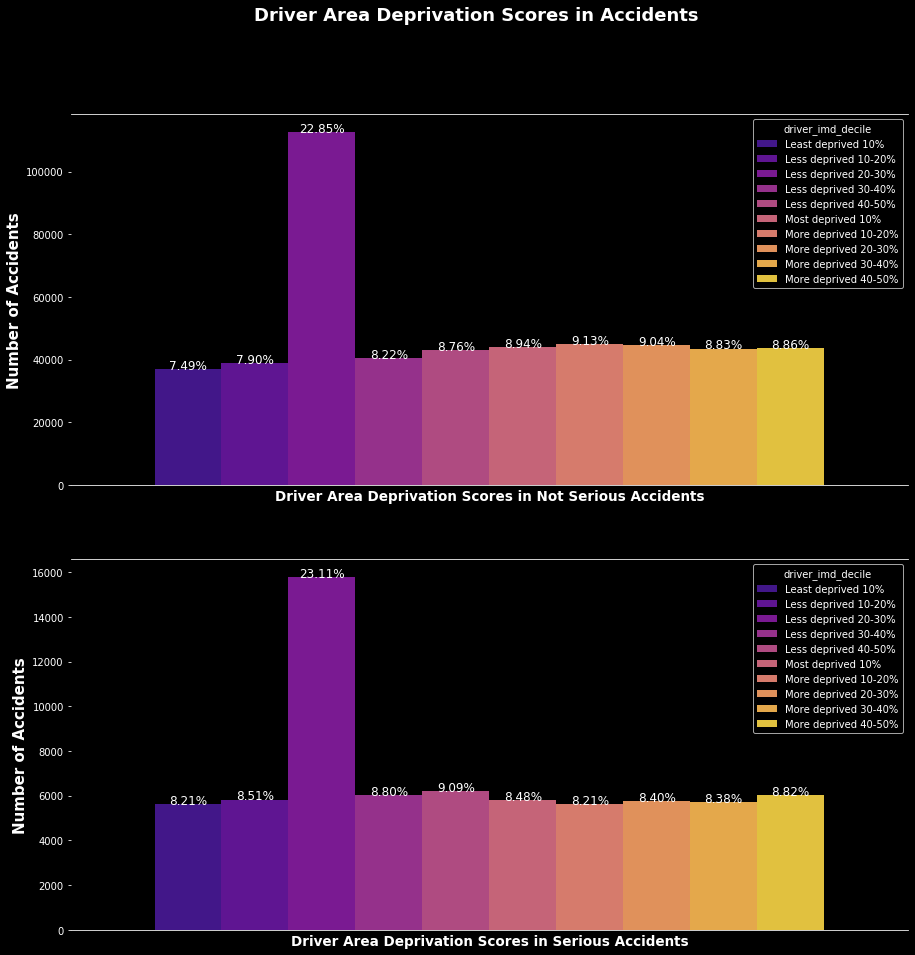

In [56]:
imd_order=["Least deprived 10%", "Less deprived 10-20%", "Less deprived 20-30%", 
           "Less deprived 30-40%","Less deprived 40-50%","Most deprived 10%",
           "More deprived 10-20%", "More deprived 20-30%", "More deprived 30-40%",
           "More deprived 40-50%"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="driver_imd_decile", hue_order=imd_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="driver_imd_decile", hue_order=imd_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Driver Area Deprivation Scores in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Driver Area Deprivation Scores in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Driver Area Deprivation Scores in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('driver_imd_decile.png')
fig.show()

#### Junction Detail
The following graphs show the road features in relations to where the accidents occured.

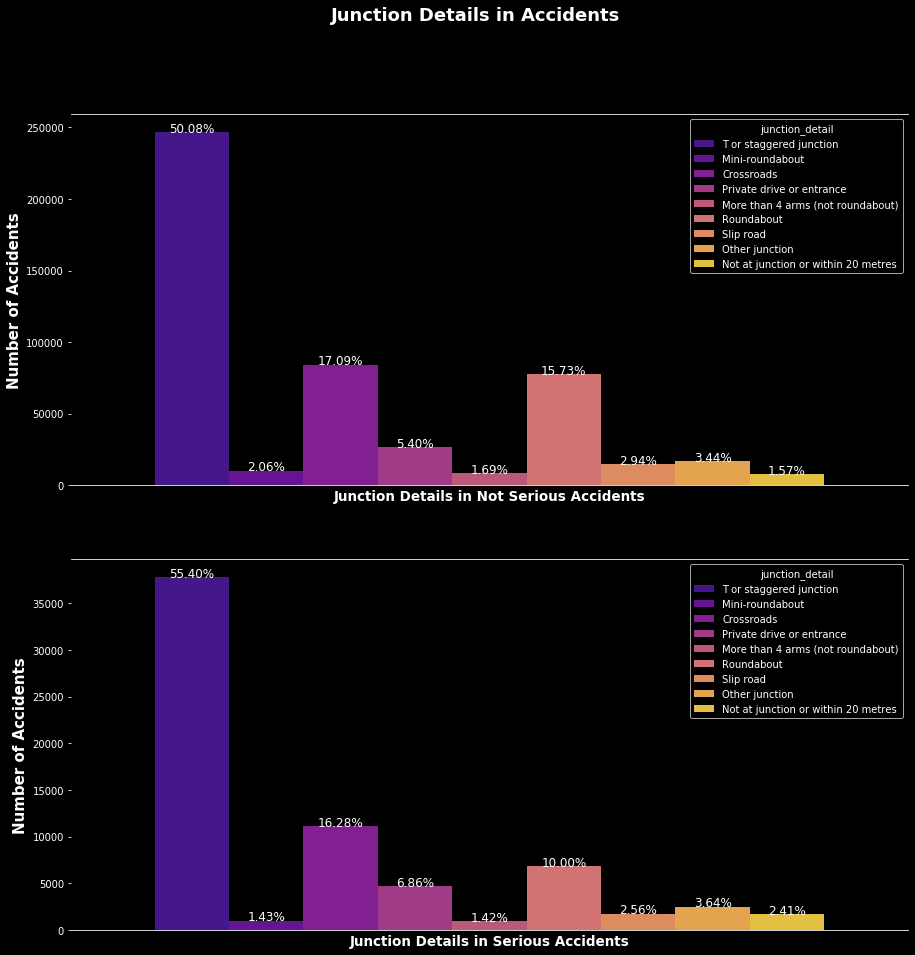

In [57]:
jud_order=['T or staggered junction', 'Mini-roundabout', 'Crossroads',
           'Private drive or entrance', 'More than 4 arms (not roundabout)',
           'Roundabout', 'Slip road', 'Other junction','Not at junction or within 20 metres']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_detail", hue_order=jud_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_detail", hue_order=jud_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Details in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Details in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Details in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('junction_detail.png')
fig.show()


#### Junction Location
The graphs below show where the accidents occured on the roads.

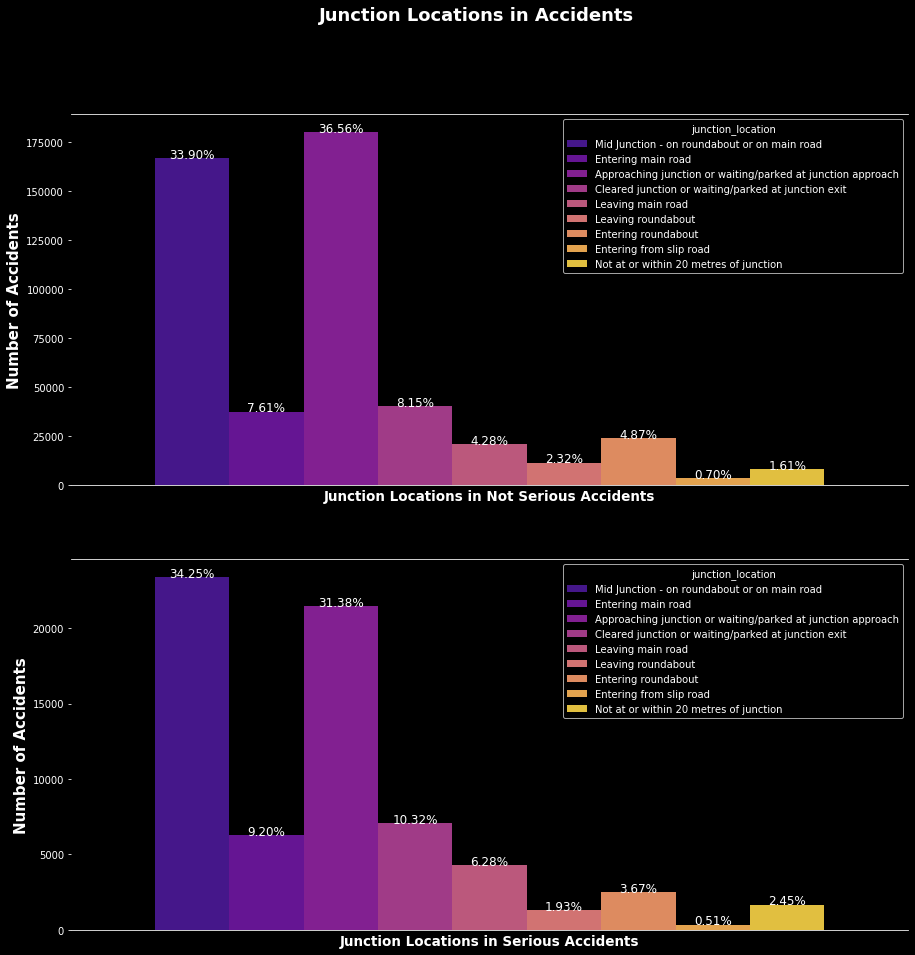

In [58]:
jul_order=['Mid Junction - on roundabout or on main road', 'Entering main road',
           'Approaching junction or waiting/parked at junction approach',
           'Cleared junction or waiting/parked at junction exit', 'Leaving main road',
           'Leaving roundabout', 'Entering roundabout', 'Entering from slip road',
           'Not at or within 20 metres of junction']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_location", hue_order=jul_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_location", hue_order=jul_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Locations in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Locations in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Locations in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')

plt.savefig('junction_location.png')
fig.show()


#### Propulsion Code
The propulsion ode is the type of fuel used to power the car. The graphs below show what type of fuel was used in the vehicles in the accidents.

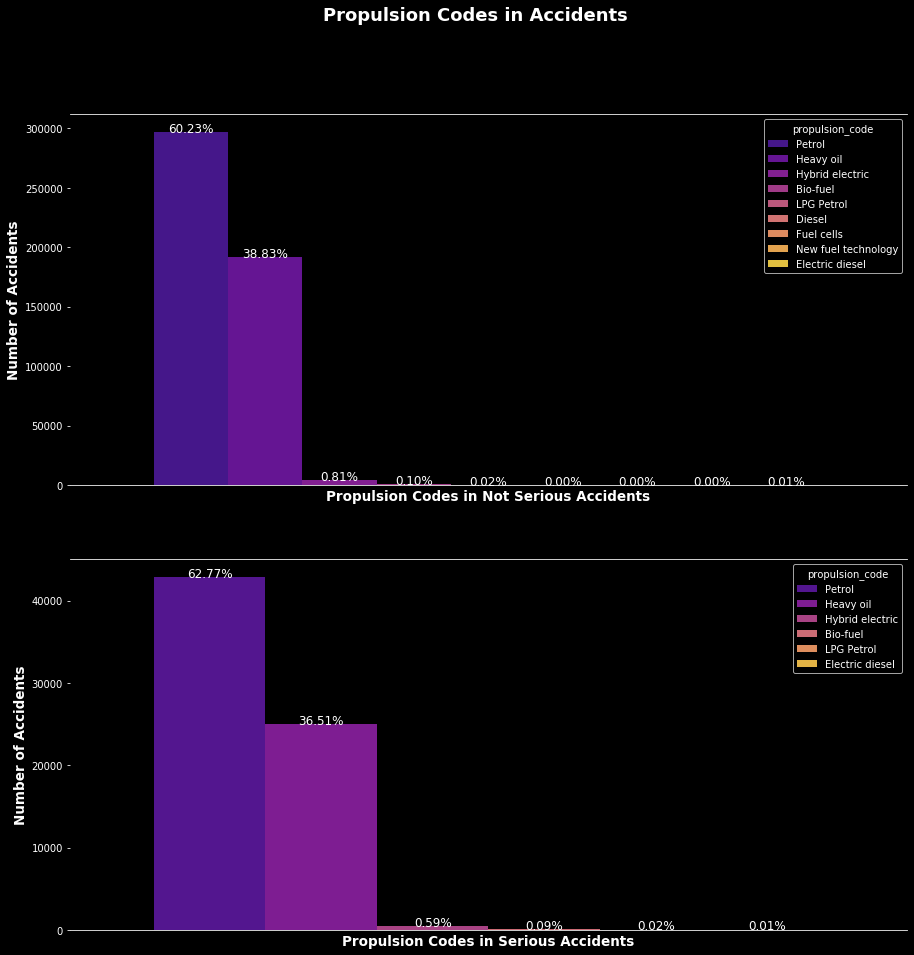

In [59]:
pd_order=['Petrol', 'Heavy oil', 'Hybrid electric', 'Bio-fuel', 'LPG Petrol', 'Diesel',
          'Fuel cells', 'New fuel technology', 'Electric diesel']
pd_order2=['Petrol', 'Heavy oil', 'Hybrid electric', 'Bio-fuel', 'LPG Petrol', 'Electric diesel']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="propulsion_code", hue_order=pd_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="propulsion_code", hue_order=pd_order2,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Propulsion Codes in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Propulsion Codes in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Propulsion Codes in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('propulsion_code.png')
fig.show()


#### Year
The year of the accidents.

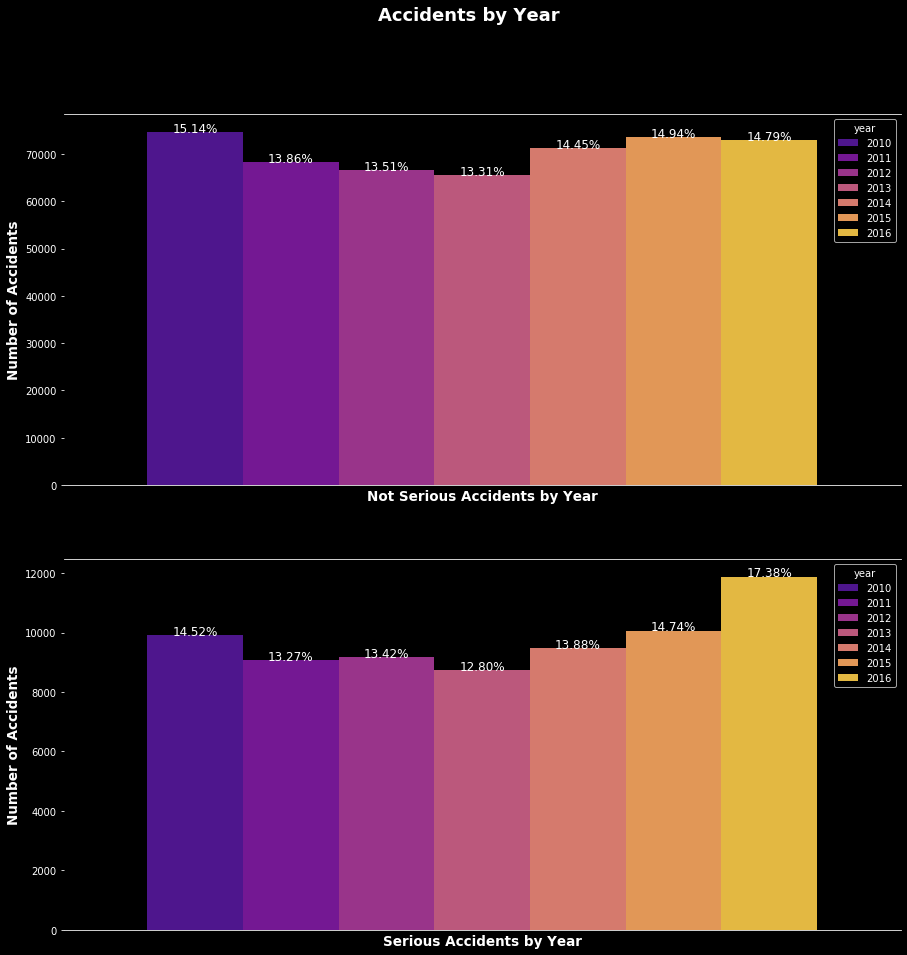

In [60]:
year_order=[2010, 2011, 2012, 2013, 2014, 2015, 2016]


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="year", hue_order=year_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="year", hue_order=year_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Accidents by Year", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents by Year\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Serious Accidents by Year', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('year.png')
fig.show()


### Visualization Summary
* <b>did_police_officer_attend_scene_of_accident:</b> Police attended most accidents but were less likely to NOT be called in serious accidents.
* <b>x1st_point_of_impact:</b> Majority of accidents were front impacted as the first point of impact. Not serious accidents had a higher percentage of Back impact accidents than serious accidents. Serious accidents had higher percentages of Offside and Nearside accidents. 
* <b>number_of_vehicles:</b>  Nothing significant.
* <b>speed_limit:</b> Majority of accidents occurred in 30 speed limit zones. It would have been beneficial to have actual data on the speeds of the vehicles involved or at least if they were speeding.
* <b>urban_or_rural_area:</b> Rural areas had a higher percentage of serious accidents. This may relate to hospital locations or emergency vehicle arrival data which was not available.
* <b>skidding_and_overturning:</b> Higher percentages of serious accidents involved skidding, jackknifing or overturning.
* <b>vehicle_leaving_carriageway:</b> Most vehicles did not leave the carriageway in either type of accident, however serious accidents had higher percentages of those that did leave the carriageway.
* <b>sex_of_driver:</b> Men were more involved in both serious and not serious accidents, however according to racfoundation.org, there are only 355 of female privately registered cars on UK roads.
* <b>vehicle_type:</b>  Motorcycles were involved in a significantly higher percentage of serious accidents than not serious accidents
* <b>vehicle_manoeuvre:</b> Nothing significant.                      
* <b>driver_home_area_type:</b> Rural and Small Towns has higher percentages of serious accidents. This may relate to hospital locations or emergency vehicle arrival data which was not available.
* <b>age_band_of_driver:</b> The age bands over the age of 25 had a higher percentage of serious accidents than not serious.
* <b>junction_control:</b>  Most areas with accidents were uncontrolled. 
* <b>hit_object_off_carriageway:</b> The majority of accidents did not involve objects being hit off the carriageway, however serious accidents had higher percentages of accidents that did involve hitting an object off the carriageway.
* <b>hit_object_in_carriageway:</b> Most accidents did not involve objects being hit in the carriageway; however serious accidents had higher percentages of accidents that did involve hitting an object off the carriageway.
* <b>driver_imd_decile:</b> Nothing significant. Most accidents occurred in areas that were Less deprived 20-30%
* <b>junction_detail:</b> T or staggered junctions were where most of the accidents occurred.
* <b>junction_location:</b> Nothing that separates the two serious types. However, most accidents seem to have occurred in Mid Junction - on roundabout or on main road or situations where the driver was approaching junction or waiting/parked at junction approach.
* <b>propulsion_code:</b> Diesel, Fuel cells, New fuel technology, vehicles were not recorded as a part of serious accidents.
* <b>year:</b> There has been a spike in percentage of serious accidents over the years. However, the percentage of not serious accidents has remained somewhat consistent

### Other Visualizations

Due to the previous visualizations a comparison of certain variables was desired to see more correlations.


#### Junction Control by Junction Detail
The following graph shows what type of traffic control were in specific areas of the road where accidents occured.

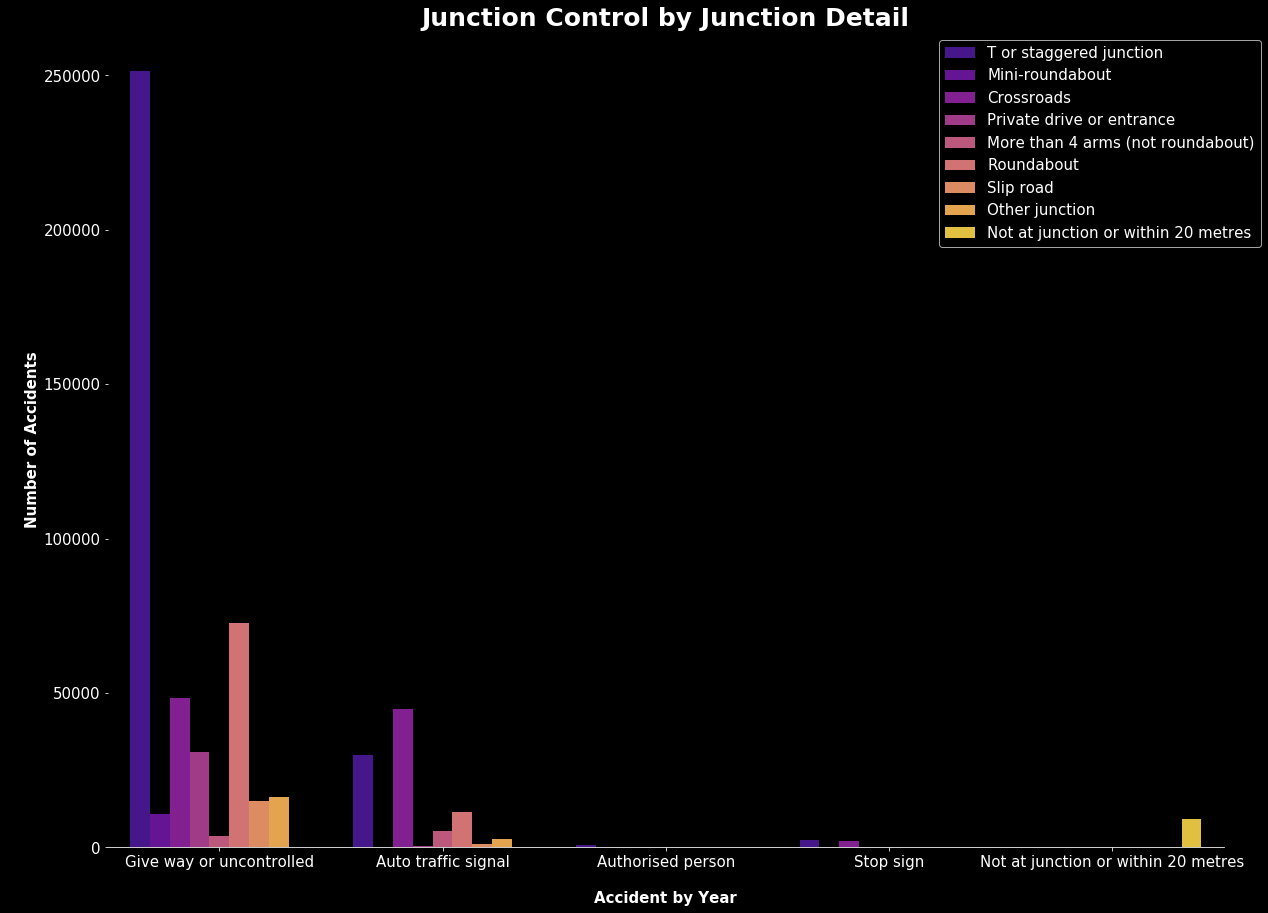

In [246]:
#Not Serious Accident
plt.figure(figsize=(20,15))
ax=sns.countplot("junction_control", hue="junction_detail",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("Junction Control by Junction Detail",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('junction_control_by_junction_detail.png')
plt.show()


#### Junction Control by Junction Location
The graph below is a more detailed look at junction areas in relation to the accidents.

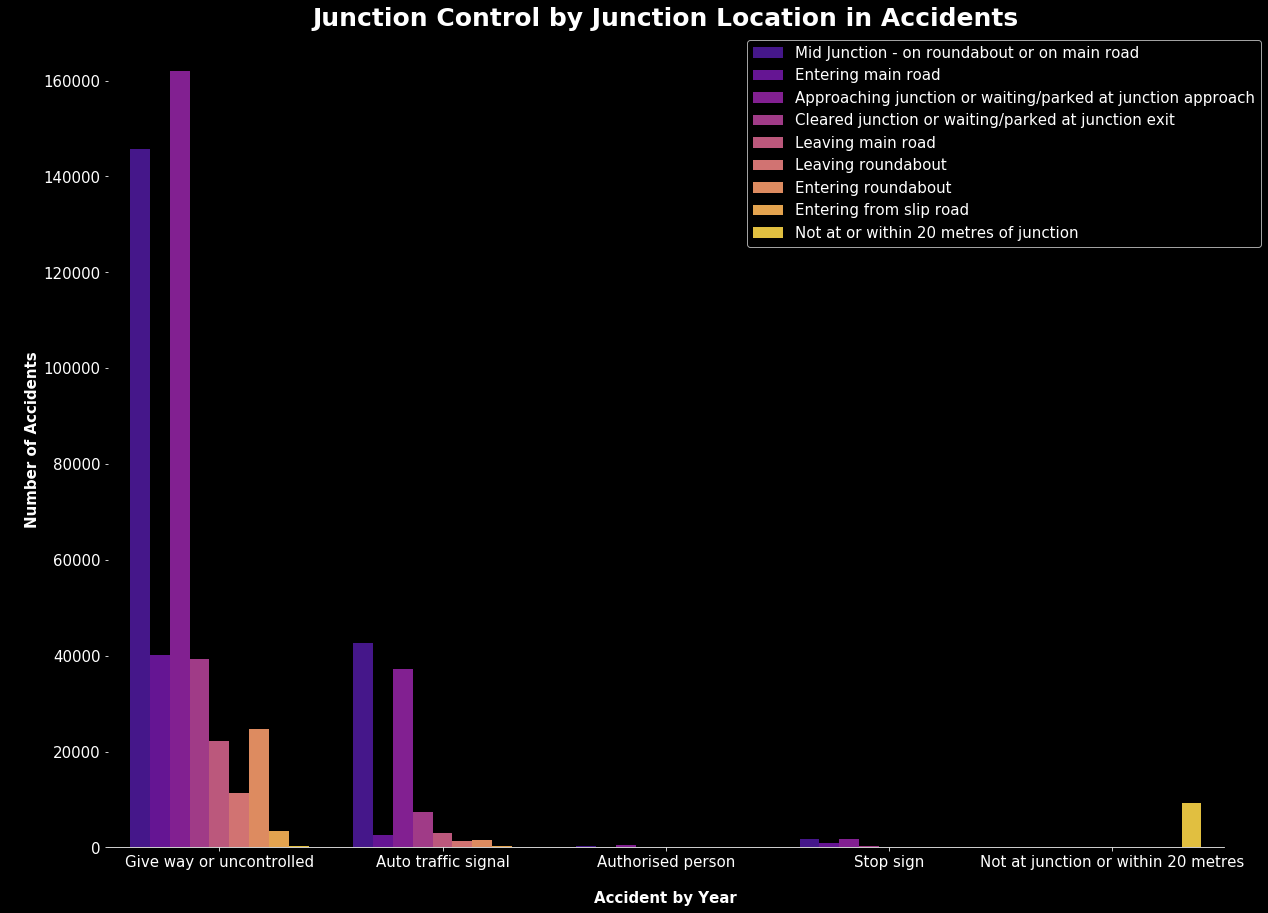

In [245]:

plt.figure(figsize=(20,15))
ax=sns.countplot("junction_control", hue="junction_location",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("Junction Control by Junction Location in Accidents",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('junction_control_by_junction_location.png')
plt.show()

#### First point of Impact by Junction Detail
The graph below shows where impact first occured in the detailed road area type.

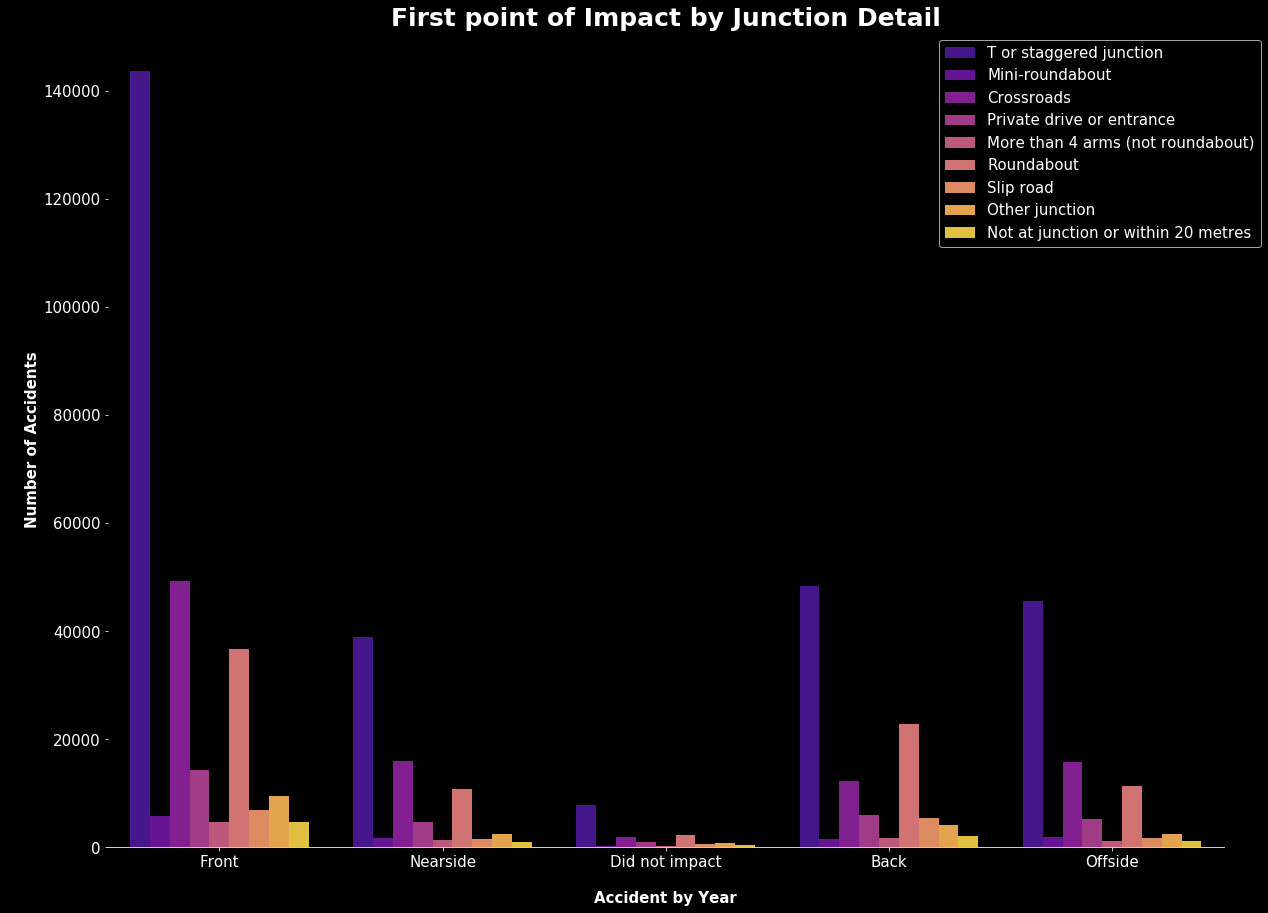

In [248]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_detail",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Detail",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_detail.png')
plt.show()

#### First point of Impact by Junction Location
The graph below shows where the accident occured and what was the first point of impact.

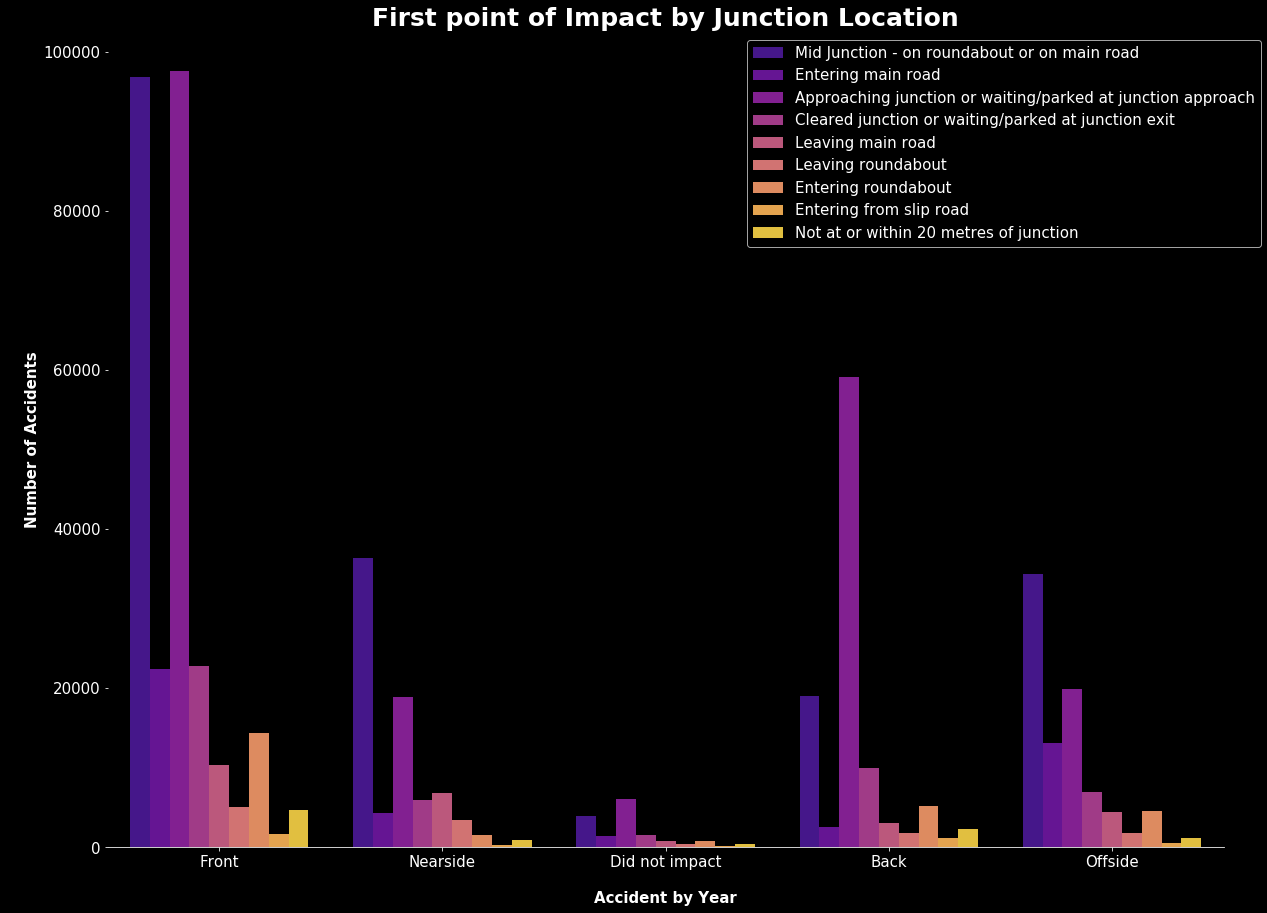

In [247]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_location",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Location",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_location.png')
plt.show()

#### Junction Control and First Point of Impact
The following graph shows what type of traffic controls (signange or otherwise) were present at the first point of impact.

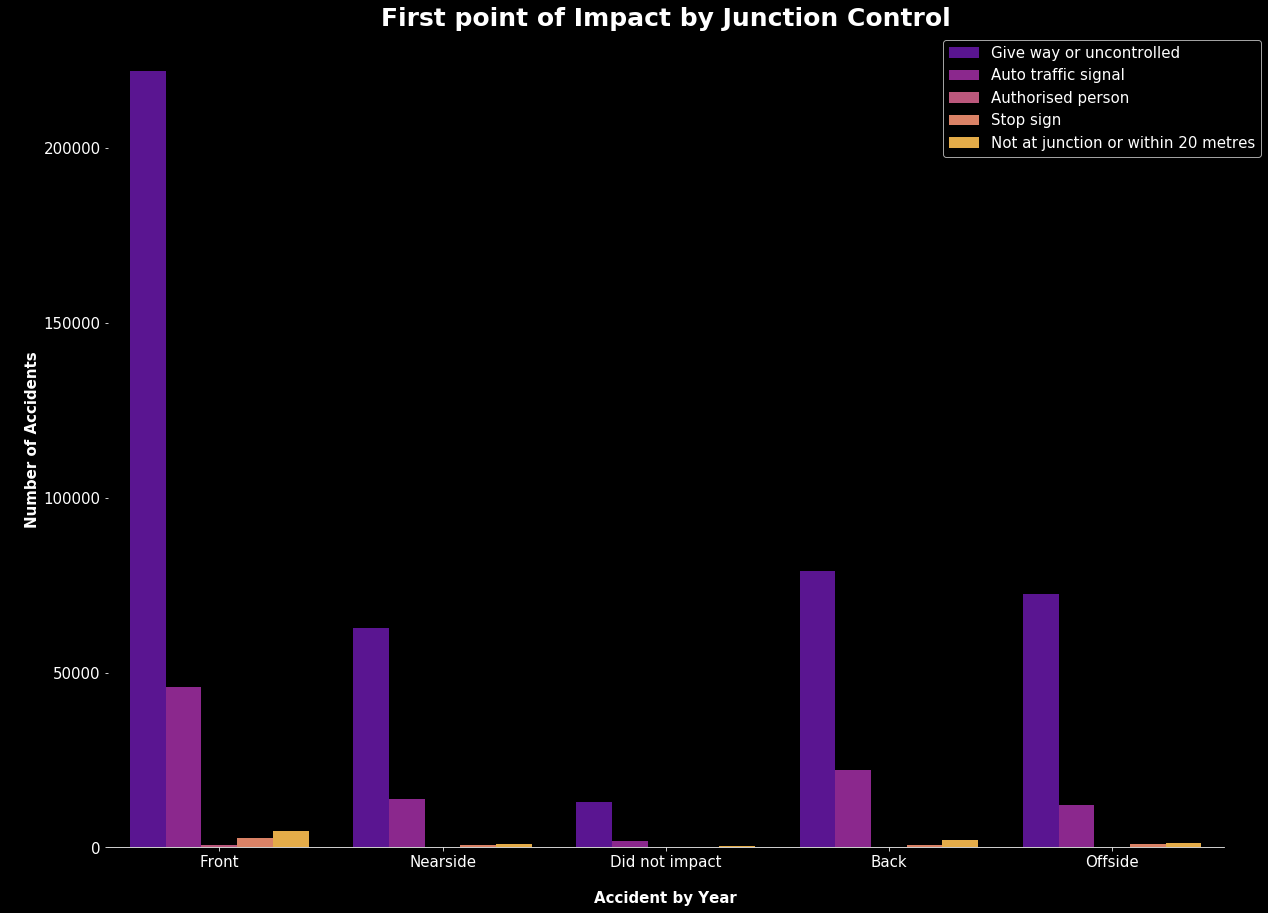

In [249]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_control",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Control",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_control.png')
plt.show()

### Other Visualizations Summary
No matter the situation above, the most accidents were involving areas that were uncontrolled. One of the main ones were the junction Detail T or staggered junction.

Other areas of concern include Mid Junctions on roundabouts or main roads and areas approaching a junction were cars were either parking or waiting in the junction. 


### Solution

From the data above more controlled areas would be benefical. Maybe signs alerting drivers of the upcoming junctions, traffic lights, or stop signs would help in some of these areas where they are feasible. 

![staggered-junctions.jpg](https://raw.githubusercontent.com/GenTaylor/Traffic-Accident-Analysis/master/staggered-junctions.jpg)

For example, this is a staggered junction, the main junction detail in accidents. One can understand how a situation such as these can lead to numerous accidents especially if proper signage is not available. Perhaps traffic lights, stop signs, or warnings indicating that they are approaching certain junctions would help reduce accidents.

#### Web Scraping
Below you wll find a web scrape of the website, [Learner Driving Centres](https://www.learnerdriving.com/learn-to-drive/highway-code/road-signs), which contains information on road signs in the UK. They were pulled to show examples of signage available to be placed. 

In [11]:
#request website
r = requests.get('https://www.learnerdriving.com/learn-to-drive/highway-code/road-signs')

#parse HTML
soup = BeautifulSoup(r.text, 'html.parser')

#filter results
results = soup.find_all('div', attrs={'class':'fifth'})

In [12]:
#done to find specific results area
first_result=results[0]
first_result
first_result.find('img')['src']

'/images/highway-code/entry-to-20-mph-zone.png'

In [13]:
#get images of signs and sign descriptions 
signage = []
for result in results:
    sign=result.find('img')['src']
    sign_desc=result.contents[1]
    signage.append((sign, sign_desc))

In [14]:
#put pulled UK Traffic Signs into dataframe
uktrafficsigns = pd.DataFrame(signage, columns=['Sign', 'Sign Description'])
uktrafficsigns.head()

Sign  \
0      /images/highway-code/entry-to-20-mph-zone.png   
1        /images/highway-code/end-of-20-mph-zone.png   
2             /images/highway-code/maximum-speed.png   
3  /images/highway-code/national-speed-limit-appl...   
4    /images/highway-code/school-crossing-patrol.png   

               Sign Description  
0          Entry to 20 mph zone  
1            End of 20 mph zone  
2                 Maximum speed  
3  National speed limit applies  
4        School crossing patrol

In [15]:
'''
the "image" is just part of the image link, 
must parse the first half in order to have full image link

'''
uktrafficsigns['Sign'] = 'https://www.learnerdriving.com/'+uktrafficsigns['Sign'] 
uktrafficsigns.head()

Sign  \
0  https://www.learnerdriving.com//images/highway...   
1  https://www.learnerdriving.com//images/highway...   
2  https://www.learnerdriving.com//images/highway...   
3  https://www.learnerdriving.com//images/highway...   
4  https://www.learnerdriving.com//images/highway...   

               Sign Description  
0          Entry to 20 mph zone  
1            End of 20 mph zone  
2                 Maximum speed  
3  National speed limit applies  
4        School crossing patrol

In [16]:
'''
In some coding below I saw that one of the fields was blank (at index 42) but was not reading as null.
In order to fix that I changed the "Sign Description" and decided to place it here.
'''
uktrafficsigns.at[42,'Sign Description']="T-junction with priority over vehicles from the right"

In [17]:
#I wanted to save this as a csv for later, and to stop unnecessary web scraping
uktrafficsigns.to_csv('uktrafficsigns.csv', header=False, index=False) 

In [18]:
#I wanted the html to show up as images instead of links
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)
ukts=HTML(uktrafficsigns.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))
HTML(uktrafficsigns.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))

In [19]:
'''
Here I am creating a df that will allow me to pull all junction signs.
"ction" was used instead of "junction" in order to pull all variables.
'''
junction =uktrafficsigns[uktrafficsigns['Sign Description'].str.contains("nction", regex=False)]

#Making it its own HTML object (same as above)

def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)

HTML(junction.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))


In [20]:
#Repeated the above steps for giveways
give=uktrafficsigns[uktrafficsigns['Sign Description'].str.contains("ive ", regex=False)]
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)

HTML(give.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))

In [21]:
#roundabouts
roundabout=uktrafficsigns[uktrafficsigns['Sign Description'].str.contains("ounda", regex=False)]

def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)

HTML(roundabout.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))

#### Mapping of Problem Areas
Below we used Tableau to map what could be deemed problem areas for the UK. These are accidents in areas with high deprivation (driver_imd_decile @ more deprived 40-50%)  and no signange at T or staggered junctions.<br>

In [1]:
%%HTML

<div class='tableauPlaceholder' id='viz1572177057382' style='position: relative'><noscript><a href='https:&#47;&#47;github.com&#47;GenTaylor&#47;Traffic-Accident-Analysis'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ac&#47;AccidentForecasting&#47;SeriousAccidentsinAreaswithHighDeprivationandNoSignage&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AccidentForecasting&#47;SeriousAccidentsinAreaswithHighDeprivationandNoSignage' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ac&#47;AccidentForecasting&#47;SeriousAccidentsinAreaswithHighDeprivationandNoSignage&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572177057382');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Below is a screenshot of the above mapping. I put this here just in case there is trouble viewing it. If you would like to view the actual worksheet for it, please click [here](https://public.tableau.com/profile/genesis.taylor#!/vizhome/AccidentForecasting/SeriousAccidentsinAreaswithHighDeprivationandNoSignage).

![mapping.PNG](https://raw.githubusercontent.com/GenTaylor/Traffic-Accident-Analysis/master/mapping.PNG)

## Machine Learning

In [3]:
#made separate dataframe w. set index that wouldnt effect data vis above
df1=df
#set index to accident_index
df1.set_index('accident_index', inplace=True)
df1.head()

1st_road_class 1st_road_number 2nd_road_number  \
accident_index                                                  
201001BS70003               B             302               0   
201001BS70004               A             402            4204   
201001BS70007    Unclassified               0               0   
201001BS70007    Unclassified               0               0   
201001BS70008               A            3217            3220   

               accident_severity carriageway_hazards       date day_of_week  \
accident_index                                                                
201001BS70003             Slight                None 2010-01-11      Monday   
201001BS70004             Slight                None 2010-01-11      Monday   
201001BS70007             Slight                None 2010-01-02    Saturday   
201001BS70007             Slight                None 2010-01-02    Saturday   
201001BS70008             Slight                None 2010-01-04      Monday   

               did_police_officer_attend_scene_of_accident  \
accident_index                                               
201001BS70003                                            1   
201001BS70004                                            1   
201001BS70007                                            1   
201001BS70007                                            1   
201001BS70008                                            1   

                        junction_control          junction_detail  ...  \
accident_index                                                     ...   
201001BS70003   Give way or uncontrolled  T or staggered junction  ...   
201001BS70004        Auto traffic signal  T or staggered junction  ...   
201001BS70007   Give way or uncontrolled          Mini-roundabout  ...   
201001BS70007   Give way or uncontrolled          Mini-roundabout  ...   
201001BS70008        Auto traffic signal               Crossroads  ...   

                 vehicle_type was_vehicle_left_hand_drive  \
accident_index                                              
201001BS70003   Goods Vehicle                          No   
201001BS70004             Car                          No   
201001BS70007             Car                          No   
201001BS70007             Car                          No   
201001BS70008             Car                          No   

               x1st_point_of_impact month  weekend hour time_of_day  season  \
accident_index                                                                
201001BS70003                 Front     1        0    7           1  winter   
201001BS70004                 Front     1        0   18           6  winter   
201001BS70007              Nearside     1        1   21           6  winter   
201001BS70007                 Front     1        1   21           6  winter   
201001BS70008              Nearside     1        0   20           6  winter   

               engine_capacity_cc_size accident_seriousness  
accident_index                                               
201001BS70003          small engine cc          Not Serious  
201001BS70004         medium engine cc          Not Serious  
201001BS70007         medium engine cc          Not Serious  
201001BS70007          small engine cc          Not Serious  
201001BS70008         medium engine cc          Not Serious  

[5 rows x 59 columns]

In [4]:
df1 = df1.drop(['accident_severity'],axis=1)

In [5]:
df1.head()

1st_road_class 1st_road_number 2nd_road_number  \
accident_index                                                  
201001BS70003               B             302               0   
201001BS70004               A             402            4204   
201001BS70007    Unclassified               0               0   
201001BS70007    Unclassified               0               0   
201001BS70008               A            3217            3220   

               carriageway_hazards       date day_of_week  \
accident_index                                              
201001BS70003                 None 2010-01-11      Monday   
201001BS70004                 None 2010-01-11      Monday   
201001BS70007                 None 2010-01-02    Saturday   
201001BS70007                 None 2010-01-02    Saturday   
201001BS70008                 None 2010-01-04      Monday   

               did_police_officer_attend_scene_of_accident  \
accident_index                                               
201001BS70003                                            1   
201001BS70004                                            1   
201001BS70007                                            1   
201001BS70007                                            1   
201001BS70008                                            1   

                        junction_control          junction_detail   latitude  \
accident_index                                                                 
201001BS70003   Give way or uncontrolled  T or staggered junction  51.484087   
201001BS70004        Auto traffic signal  T or staggered junction  51.509212   
201001BS70007   Give way or uncontrolled          Mini-roundabout  51.513314   
201001BS70007   Give way or uncontrolled          Mini-roundabout  51.513314   
201001BS70008        Auto traffic signal               Crossroads  51.484361   

                ...   vehicle_type was_vehicle_left_hand_drive  \
accident_index  ...                                              
201001BS70003   ...  Goods Vehicle                          No   
201001BS70004   ...            Car                          No   
201001BS70007   ...            Car                          No   
201001BS70007   ...            Car                          No   
201001BS70008   ...            Car                          No   

               x1st_point_of_impact  month weekend hour time_of_day  season  \
accident_index                                                                
201001BS70003                 Front      1       0    7           1  winter   
201001BS70004                 Front      1       0   18           6  winter   
201001BS70007              Nearside      1       1   21           6  winter   
201001BS70007                 Front      1       1   21           6  winter   
201001BS70008              Nearside      1       0   20           6  winter   

               engine_capacity_cc_size accident_seriousness  
accident_index                                               
201001BS70003          small engine cc          Not Serious  
201001BS70004         medium engine cc          Not Serious  
201001BS70007         medium engine cc          Not Serious  
201001BS70007          small engine cc          Not Serious  
201001BS70008         medium engine cc          Not Serious  

[5 rows x 58 columns]

In [6]:
print(df1.columns)

Index(['1st_road_class', '1st_road_number', '2nd_road_number',
       'carriageway_hazards', 'date', 'day_of_week',
       'did_police_officer_attend_scene_of_accident', 'junction_control',
       'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'local_authority_highway', 'longitude',
       'lsoa_of_accident_location', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year', 'inscotland', 'age_band_of_driver', 'age_of_vehicle',
       'driver_home_area_type', 'driver_imd_decile', 'engine_capacity_cc',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'journey_purpose_of_driver', 'junction_location', 'make', 'model',
       'propulsion_code', 'sex_of_driver', 'skidd

### Preprocessing

In [7]:
#separate dtypes
notif=df1.select_dtypes(exclude=['int','float','int64'])
intfldtypes = df1.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfldtypes.columns)

#checking to make sure all are accounted for
print(df1.shape)
print(notif.shape)
print(intfldtypes.shape)

Objects Index(['1st_road_class', '1st_road_number', '2nd_road_number',
       'carriageway_hazards', 'date', 'day_of_week',
       'did_police_officer_attend_scene_of_accident', 'junction_control',
       'junction_detail', 'light_conditions', 'local_authority_district',
       'local_authority_highway', 'lsoa_of_accident_location',
       'number_of_casualties', 'number_of_vehicles',
       'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland',
       'age_band_of_driver', 'age_of_vehicle', 'driver_home_area_type',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'journey_purpose_of_driver', 'junction_location', 'make', 'model',
       'propulsion_code', 'sex_of_driver', 'skidding_and_overturning',
       'towing_and_articulation', 'vehicle_leaving_carriageway',
   

Label Encoder was used instead of OneHotEncoder due to the memory errors One Hot Encoder caused in the data. The algorithms used will be classifiers, through boosting and trees, and not linear. 

In [8]:
#label encode objects
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_ml= pd.concat([obj_le,intfldtypes], axis=1, sort=False)
#check shape
print(df_ml.shape)

(561135, 58)


In [9]:
#Set up of X and Y
X= df_ml.drop(['accident_seriousness'],axis=1)
y= df_ml['accident_seriousness']

In [10]:
df_ml.accident_seriousness.value_counts()

0    492804
1     68331
Name: accident_seriousness, dtype: int64

In [11]:
df.dtypes

1st_road_class                                         object
1st_road_number                                        object
2nd_road_number                                        object
accident_severity                                      object
carriageway_hazards                                    object
date                                           datetime64[ns]
day_of_week                                            object
did_police_officer_attend_scene_of_accident            object
junction_control                                       object
junction_detail                                        object
latitude                                              float64
light_conditions                                       object
local_authority_district                               object
local_authority_highway                                object
longitude                                             float64
lsoa_of_accident_location                              object
number_o

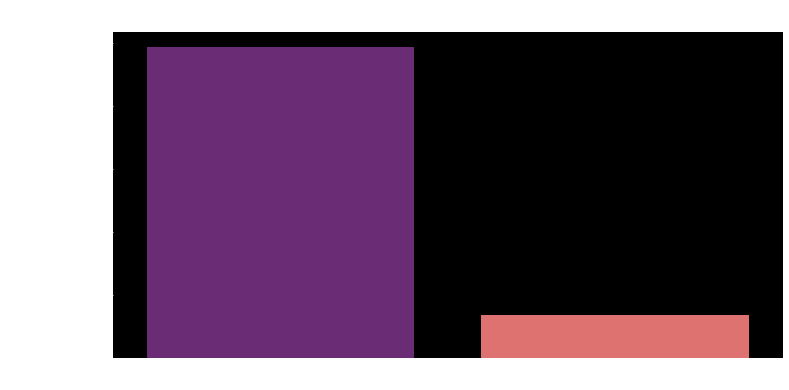

In [12]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="accident_seriousness", palette="magma", data=df)

plt.style.use('dark_background')
plt.title("Accident Seriousness",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('accident_seriousness.png')
plt.show()

### Imbalanced Data
The data in this dataset is extremely imbalanced for what we are trying to predict. We are going to resample the data as undersampling, where we reduce the number of majority (Not Serious Accidents) samples.<br><br> 
***
The machine learning classifier algorithms that we are going to use are as follows:
* Bagging Classifier (sklearn)
* AdaBoost Classifier (sklearn)
* Random Forest Classifier (sklearn)
* Gradient Boosting Classifier (sklearn)*
* LightGBM Classifier (LightGBM)
* XGBoost Classifier (xgboost)
* Balanced Bagging Classifier(imblearn)
* Balanced Random Forest Classifier (imblearn) 
* Easy Ensemble Classifier (imblearn)<br><br>
***
*Gradient Boosting was commented out because of the time it took to run (18hrs) and not having relevant enough results to still consider.

### Resample: Undersampling

In [13]:
# setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, 
                                                                    test_size=0.25, random_state=27)

In [14]:
# concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

In [15]:
# separate minority and majority classes
not_severe = res_X[res_X.accident_seriousness==0]
severe = res_X[res_X.accident_seriousness==1]

In [16]:
# decrease majority
not_severe_decreased = resample(not_severe,
                          replace=True, # sample with replacement
                          n_samples=len(severe), # match number in majority class
                          random_state=27) # reproducible results

In [17]:
# combine majority and severe_increased minority
newdf = pd.concat([severe, not_severe_decreased])

In [18]:
newdf.accident_seriousness.value_counts()

1    51357
0    51357
Name: accident_seriousness, dtype: int64

In [19]:
res_X_train = newdf.drop('accident_seriousness', axis=1)
res_y_train = newdf.accident_seriousness

### Unsupervised Learning
Before, we get in to predictions, we are going to complete some machine learning in ordered to see how the data relates to each other.
We are going to do this on the resampled data as well, in order to avoid bias. We will use two clusters which, in theory, represent the two variables for accident_seriousness, Not Serious & Serious

In [20]:
# "clustering" using kmode algorithm that is designed to handle mixed data
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1)
fitClusters_huang = km_huang.fit_predict(newdf)
fitClusters_huang

array([1, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [21]:
newdf1 = newdf.copy().reset_index()
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([newdf1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [22]:
combinedDf.head()

accident_index  1st_road_class  1st_road_number  2nd_road_number  \
0  201554A415715               0              429                0   
1  2010440174154               0               27             2391   
2  201506N097860               5                0                0   
3  2016460101917               0              252              251   
4  201342I085803               0              120                0   

   carriageway_hazards  date  day_of_week  \
0                    1  2148            4   
1                    1   119            0   
2                    1  1880            5   
3                    1  2426            5   
4                    1  1182            4   

   did_police_officer_attend_scene_of_accident  junction_control  \
0                                            0                 2   
1                                            0                 2   
2                                            0                 2   
3                                            0                 2   
4                                            0                 2   

   junction_detail  ...  engine_capacity_cc_size   latitude  longitude  \
0                8  ...                        2  51.556002  -2.110741   
1                6  ...                        1  50.895352  -1.319297   
2                8  ...                        0  53.591164  -2.295013   
3                6  ...                        1  51.221226   0.878850   
4                8  ...                        2  51.877039   0.674514   

   speed_limit  year  driver_imd_decile  engine_capacity_cc  month  \
0         30.0  2015                8.0              1299.0     11   
1         30.0  2010                5.0              1997.0      4   
2         30.0  2015                8.0              2143.0      2   
3         40.0  2016                8.0              1560.0      8   
4         60.0  2013                9.0              1149.0      3   

   accident_seriousness  cluster_predicted  
0                     1                  1  
1                     1                  0  
2                     1                  0  
3                     1                  0  
4                     1                  0  

[5 rows x 60 columns]

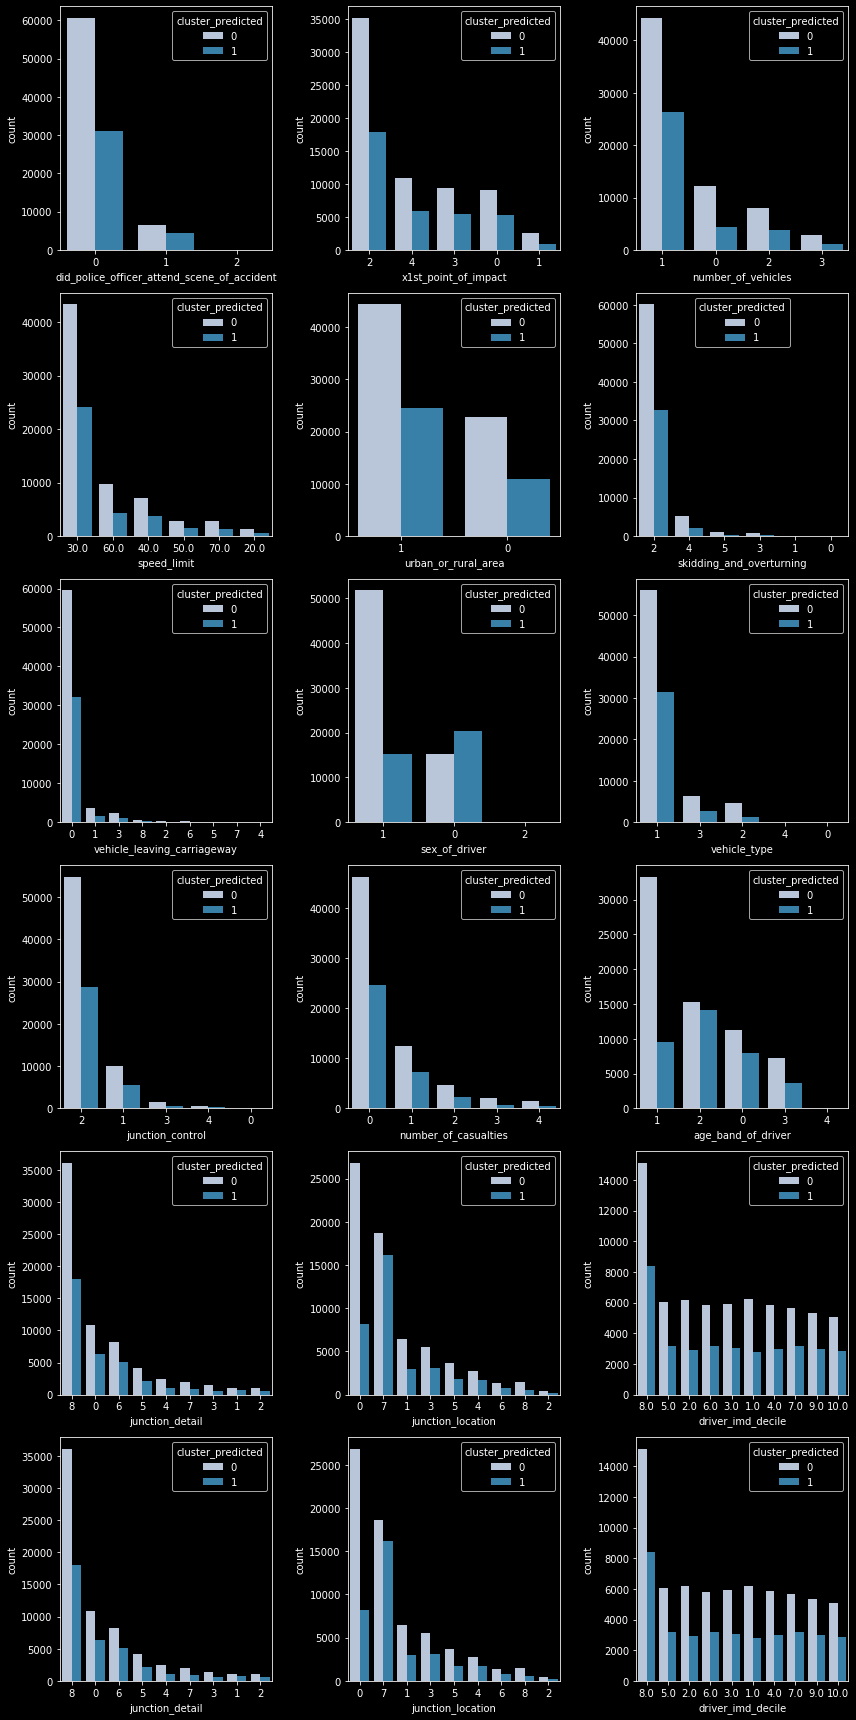

In [23]:
#plotting a few of these features just to see how they relate to the clustering for seriousness
f, axs = plt.subplots(nrows=6, ncols=3,figsize = (12,24))
plt.style.use('dark_background')
sns.countplot(x=combinedDf['did_police_officer_attend_scene_of_accident'],
              order=combinedDf['did_police_officer_attend_scene_of_accident'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0,0])
sns.countplot(x=combinedDf['x1st_point_of_impact'],
              order=combinedDf['x1st_point_of_impact'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0,1])
sns.countplot(x=combinedDf['number_of_vehicles'],
              order=combinedDf['number_of_vehicles'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0,2])
sns.countplot(x=combinedDf['speed_limit'],
              order=combinedDf['speed_limit'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1,0])
sns.countplot(x=combinedDf['urban_or_rural_area'],
              order=combinedDf['urban_or_rural_area'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1,1])
sns.countplot(x=combinedDf['skidding_and_overturning'],
              order=combinedDf['skidding_and_overturning'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1,2])
sns.countplot(x=combinedDf['vehicle_leaving_carriageway'],
              order=combinedDf['vehicle_leaving_carriageway'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2,0])
sns.countplot(x=combinedDf['sex_of_driver'],
              order=combinedDf['sex_of_driver'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2,1])
sns.countplot(x=combinedDf['vehicle_type'],
              order=combinedDf['vehicle_type'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2,2])
sns.countplot(x=combinedDf['junction_control'],
              order=combinedDf['junction_control'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[3,0])
sns.countplot(x=combinedDf['number_of_casualties'],
              order=combinedDf['number_of_casualties'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[3,1])
sns.countplot(x=combinedDf['age_band_of_driver'],
              order=combinedDf['age_band_of_driver'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[3,2])
sns.countplot(x=combinedDf['junction_detail'],
              order=combinedDf['junction_detail'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[4,0])
sns.countplot(x=combinedDf['junction_location'],
              order=combinedDf['junction_location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[4,1])
sns.countplot(x=combinedDf['driver_imd_decile'],
              order=combinedDf['driver_imd_decile'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[4,2])
sns.countplot(x=combinedDf['junction_detail'],
              order=combinedDf['junction_detail'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[5,0])
sns.countplot(x=combinedDf['junction_location'],
              order=combinedDf['junction_location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[5,1])
sns.countplot(x=combinedDf['driver_imd_decile'],
              order=combinedDf['driver_imd_decile'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[5,2])
plt.tight_layout()
plt.savefig('clusterplot.png')
plt.show()

Looking at these graphs we can see the patterns of how each category of eacch column pairs off with the clustering on accident_seriousness.

### Supervised Learning with Resampling as Undersampling

In [24]:
#confusion matrix plot function
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.style.use('dark_background')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab20')
    classNames = ['Not Serious','Serious']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center', 
                     color='black')
    plt.show()

#### Method 1
First, we are going to run some standard classifier algorithms using the resampling method from above, gather the results of some scoring metrics (Accuracy, Log Loss, Cross Validation, Recall, Roc Auc, F1, False Positive Rate, Error Rate), and put those scores into a dataframe





BaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.9727%
Cross validation scores: 0.6871312576669197
Log Loss: 0.6157355650730744


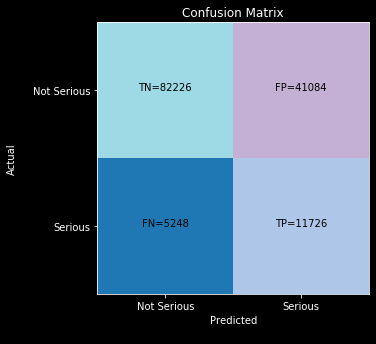





AdaBoostClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.7446%
Cross validation scores: 0.6572911190295384
Log Loss: 0.6880453803827911


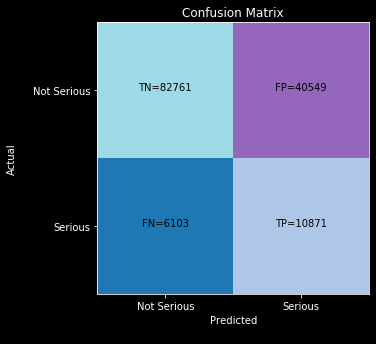





RandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 67.0882%
Cross validation scores: 0.6884942656307805
Log Loss: 0.6123101302134623


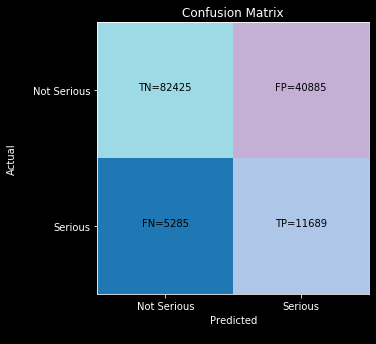





LGBMClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 67.8124%
Cross validation scores: 0.6796833927215374
Log Loss: 0.596513578691033


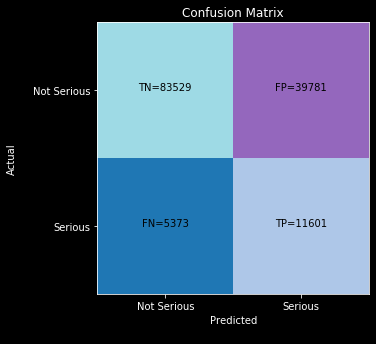





XGBClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.7995%
Cross validation scores: 0.6879295909028954
Log Loss: 0.6577360727445484


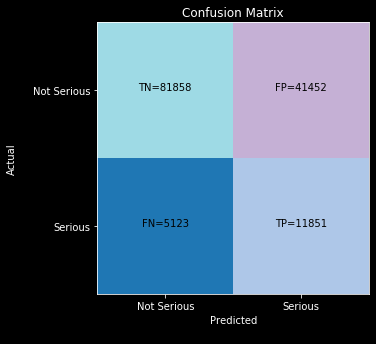

****************************************


In [25]:
#Try modeling using  different classification models
classifiers = [
    BaggingClassifier(max_features=X.shape[1], n_estimators=500, random_state=42),
    AdaBoostClassifier( n_estimators=500, learning_rate=0.05, random_state=42),
    RandomForestClassifier(criterion='entropy', max_depth=40,max_features=X.shape[1], 
                           min_samples_split=8, n_estimators=500, random_state=42),
    LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                   n_estimators=500, num_leaves=50, random_state = 42),
    XGBClassifier(learning_rate=0.05, n_estimators=500, subsample= 1,random_state = 42,
                        gamma = 1, max_depth=40)]
    
    


#putting results in df
res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results = pd.DataFrame(columns=res_cols)

for clf in classifiers:
    clf.fit(res_X_train, res_y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"Results:")
       
    print('~'*40)
    y_pred = clf.predict(res_X_test)
    acc = accuracy_score(res_y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    cv= np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=3))
    print("Cross validation scores:",cv)
    
    
    train_predictions = clf.predict_proba(res_X_test)
    logloss = log_loss(res_y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(res_y_test, y_pred)
    
    cm_plot(cm)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(res_y_test,y_pred).ravel()
    
    fpr = fp/(tn+fp)
    ers = 1-acc
    rec= recall_score(res_y_test, y_pred)
    roc=roc_auc_score(res_y_test, y_pred)
    f1s=f1_score(res_y_test, y_pred)
    results_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3), 
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),
                                   round(f1s*100,3),round(fpr*100,3),round(ers*100,3)]],
                                 columns=res_cols)
    results = results.append(results_final)
    
print("*"*40)

In [26]:
print("Results Shape",results.shape)
results.head(10)

Results Shape (5, 9)


Classifier  Accuracy  Log Loss  Cross Val  Recall  Roc Auc  \
0       BaggingClassifier    66.973     0.616     68.713  69.082   67.882   
0      AdaBoostClassifier    66.745     0.688     65.729  64.045   65.581   
0  RandomForestClassifier    67.088     0.612     68.849  68.864   67.854   
0          LGBMClassifier    67.812     0.597     67.968  68.346   68.042   
0           XGBClassifier    66.799     0.658     68.793  69.819   68.101   

       F1  False Positive Rate  Error Rate  
0  33.607               33.318      33.027  
0  31.789               32.884      33.255  
0  33.614               33.156      32.912  
0  33.943               32.261      32.188  
0  33.727               33.616      33.201

#### Method 2
For the following Balanced algorithms from imblearn we will be using the standard testing and training sets (X_train, X_test, y_train, y_test) and will allow the algorithms to do the resampling.<br> <br>For the sampling_strategy, we will be using majority as the solution.<br><br>'majority': resample only the majority class

We will then gather the results of some scoring metrics (Accuracy, Log Loss, Cross Validation, Recall, Roc Auc, F1, False Positive Rate, Error Rate), and put those scores into a dataframe.

In [27]:
#train_tes_split without resampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)





BalancedBaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 78.5321%
Cross validation scores: 0.7835718595519356
Log Loss: 0.5083639622989169


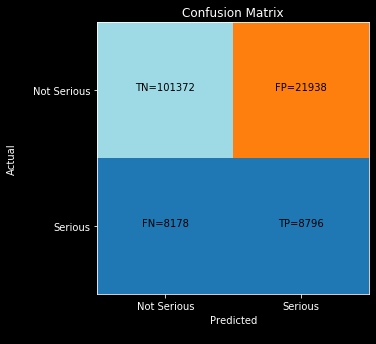





EasyEnsembleClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.6092%
Cross validation scores: 0.6677565267506275
Log Loss: 0.6897912318334272


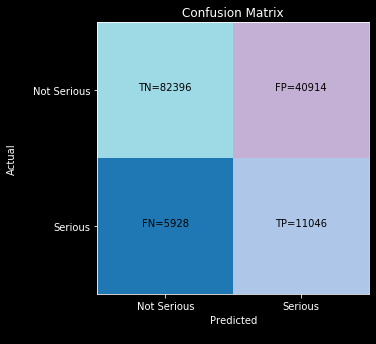





BalancedRandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 67.2785%
Cross validation scores: 0.6711282603625109
Log Loss: 0.6076769094064609


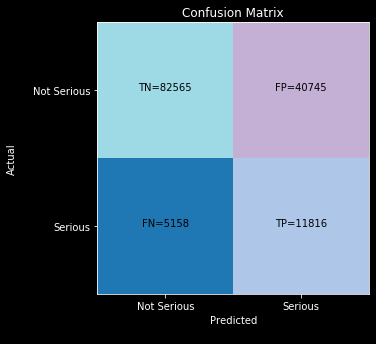

****************************************


In [28]:
#Try modeling using  different classification models
classifiers2 = [
    BalancedBaggingClassifier(max_features=X.shape[1], n_estimators=500, replacement=True,
                              sampling_strategy='majority', random_state=42),
    EasyEnsembleClassifier(n_estimators=500, random_state=42, replacement=True,
                           sampling_strategy='majority'),
    BalancedRandomForestClassifier(criterion='entropy', max_depth=40,min_samples_leaf = 1, 
                                   max_features=X.shape[1], sampling_strategy='majority', 
                                   replacement=True, min_samples_split=8, n_estimators=500,
                                   random_state=42)]

#putting results in df
res_cols2=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results2 = pd.DataFrame(columns=res_cols2)

for clf2 in classifiers2:
    clf2.fit(X_train, y_train)
    name2 = clf2.__class__.__name__
    
    print("\n"*3)
    print(name2,"Results:")
       
    print('~'*40)
    y_pred2 = clf2.predict(X_test)
    acc2 = accuracy_score(y_test, y_pred2)
    print("Accuracy: {:.4%}".format(acc2))
    
    cv2= np.mean(cross_val_score(clf2, X_train, y_train, cv=3))
    print("Cross validation scores:",cv2)
    
    
    train_predictions2 = clf2.predict_proba(X_test)
    logloss2 = log_loss(y_test, train_predictions2)
    print("Log Loss: {}".format(logloss2))
    
    cm2 = confusion_matrix(y_test, y_pred2)
    
    cm_plot(cm2)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred2).ravel()
    
    fpr2 = fp/(tn+fp)
    ers2 = 1-acc
    rec2= recall_score(y_test, y_pred2)
    roc2=roc_auc_score(y_test, y_pred2)
    f1s2=f1_score(y_test, y_pred2)
    results_final2 = pd.DataFrame([[name2, round(acc2*100,3), round(logloss2,3), 
                                   round(cv2*100,3), round(rec2*100,3), round(roc2*100,3),
                                   round(f1s2*100,3),round(fpr2*100,3),round(ers2*100,3)]],
                                 columns=res_cols2)
    results2 = results2.append(results_final2)
    
print("*"*40)

In [29]:
print("Results 2 Shape",results2.shape)
results2.head(10)

Results 2 Shape (3, 9)


Classifier  Accuracy  Log Loss  Cross Val  Recall  \
0       BalancedBaggingClassifier    78.532     0.508     78.357  51.820   
0          EasyEnsembleClassifier    66.609     0.690     66.776  65.076   
0  BalancedRandomForestClassifier    67.279     0.608     67.113  69.612   

   Roc Auc      F1  False Positive Rate  Error Rate  
0   67.015  36.874               17.791      33.201  
0   65.948  32.048               33.180      33.201  
0   68.285  33.986               33.043      33.201

We will now combine the dataframes from both methods into one datframe for analyzing and visualizations

In [30]:
ml_results = pd.concat([results,results2])
print("Shape",ml_results.shape)
ml_results.head(10)

Shape (8, 9)


Classifier  Accuracy  Log Loss  Cross Val  Recall  \
0               BaggingClassifier    66.973     0.616     68.713  69.082   
0              AdaBoostClassifier    66.745     0.688     65.729  64.045   
0          RandomForestClassifier    67.088     0.612     68.849  68.864   
0                  LGBMClassifier    67.812     0.597     67.968  68.346   
0                   XGBClassifier    66.799     0.658     68.793  69.819   
0       BalancedBaggingClassifier    78.532     0.508     78.357  51.820   
0          EasyEnsembleClassifier    66.609     0.690     66.776  65.076   
0  BalancedRandomForestClassifier    67.279     0.608     67.113  69.612   

   Roc Auc      F1  False Positive Rate  Error Rate  
0   67.882  33.607               33.318      33.027  
0   65.581  31.789               32.884      33.255  
0   67.854  33.614               33.156      32.912  
0   68.042  33.943               32.261      32.188  
0   68.101  33.727               33.616      33.201  
0   67.015  36.874               17.791      33.201  
0   65.948  32.048               33.180      33.201  
0   68.285  33.986               33.043      33.201

In [64]:
#save to csv
ml_results.to_csv('ml_results.csv')

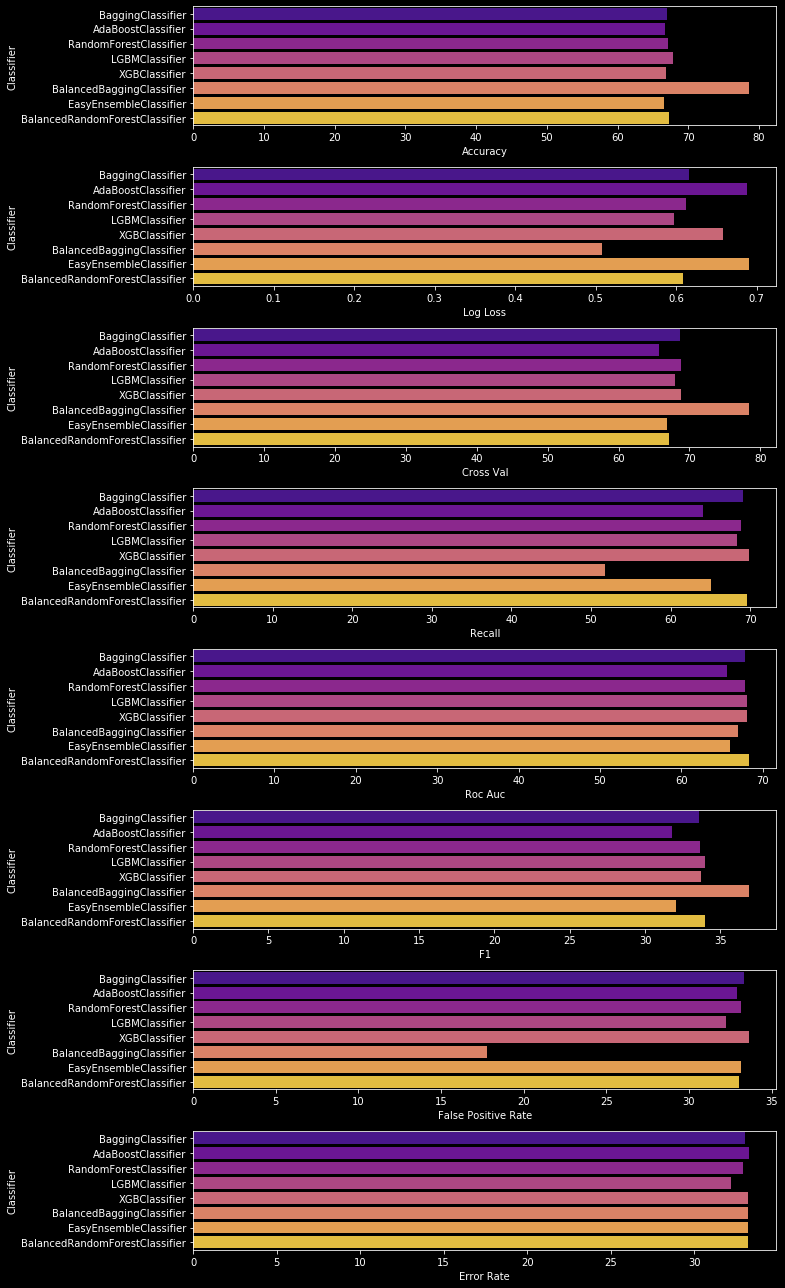

In [54]:
#Visualize scores for all model

fig, ax =plt.subplots(nrows=8, ncols=1, figsize = (11,18))
plt.style.use('dark_background')
sns.barplot(x='Accuracy', y='Classifier', data=ml_results, palette='plasma', ax=ax[0])
sns.barplot(x='Log Loss', y='Classifier', data=ml_results, palette='plasma', ax=ax[1])
sns.barplot(x='Cross Val', y='Classifier', data=ml_results, palette='plasma', ax=ax[2])
sns.barplot(x='Recall', y='Classifier', data=ml_results, palette='plasma', ax=ax[3])
sns.barplot(x='Roc Auc', y='Classifier', data=ml_results, palette='plasma', ax=ax[4])
sns.barplot(x='F1', y='Classifier', data=ml_results, palette='plasma', ax=ax[5])
sns.barplot(x='False Positive Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[6])
sns.barplot(x='Error Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[7])

plt.tight_layout()
plt.show()

##### Choice

Based on the visualizations above, Balanced Bagging Classifier from imblearn is the algorithm of choice for this data. While some of the scores may have been close, Balanced Bagging Classifier had higher scores in Accuracy, Cross Validation, and Specificity. The algorithm also had the lower Error Rate and False Positive Rates of the group.

#### Balanced Bagging Classifier with LightGBM
Balanced Bagging Classifier performed thest best of the classifiers, however, I was not comfortable with how close  its predictions were for Serious Accidents in the confusion matrix. Due to this, I decided to combine Balanced Bagging Classifier with the second highest performing algorithm, LightGBM to see what results I would get.

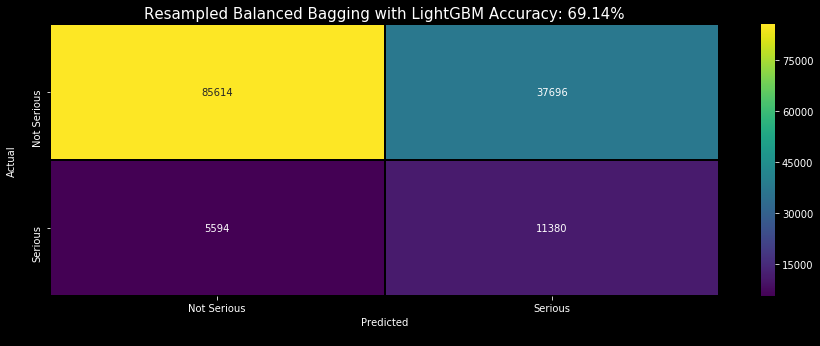

Cross Val Score was 69.67%. It was commented out here to save time when re-running.
Check UK_Road_Safety_Traffic_Accidents_and_Vehicles(old).ipynb to see proof



Resampled Balanced Bagging with LightGBM Time:  6522.161206007004


In [32]:
#start
start_res_bbag_w_lgbm = time.time()

# Balanced Bagging Classifier
res_bbag_w_lgbm = BalancedBaggingClassifier(base_estimator=LGBMClassifier(learning_rate =0.03, 
                                                                          max_depth=40, 
                                                                          min_data_in_leaf=10,
                                                                          n_estimators=500, 
                                                                          num_leaves=50, 
                                                                          random_state = 42), 
                                            max_features=X.shape[1], n_estimators=500, 
                                            replacement=True, sampling_strategy='majority', 
                                            random_state=42)

res_bbag_w_lgbm.fit(X_train, y_train)
pred_res_bbag_w_lgbm = res_bbag_w_lgbm.predict(X_test)

   
# Creates a confusion matrix
res_bbag_w_lgbm_cm = confusion_matrix(y_test,pred_res_bbag_w_lgbm)

# Transform to df for easier plotting
res_bbag_w_lgbm_cm_df = pd.DataFrame(res_bbag_w_lgbm_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))
plt.style.use('dark_background')
sns.heatmap(res_bbag_w_lgbm_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled Balanced Bagging with LightGBM Accuracy: {0:.2f}%'.format(accuracy_score(y_test,pred_res_bbag_w_lgbm )*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()
# print("Resampled Balanced Bagging with LightGBM Classifier Cross Validation Score: {:0.2f}%"
#       .format(np.mean(cross_val_score(res_bbag_w_lgbm, X_train, y_train, cv=3)*100)))
print('Cross Val Score was 69.67%. It was commented out here to save time when re-running.') 
print('Check UK_Road_Safety_Traffic_Accidents_and_Vehicles(old).ipynb to see proof')
print('\n')
#end
end_res_bbag_w_lgbm = time.time()
print("\nResampled Balanced Bagging with LightGBM Time: ",end_res_bbag_w_lgbm - start_res_bbag_w_lgbm)

In [34]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test,pred_res_bbag_w_lgbm).ravel()

accuracy = accuracy_score(y_test,pred_res_bbag_w_lgbm)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy


train_predictions2 = res_bbag_w_lgbm.predict_proba(X_test)


print("Resampled Balanced Bagging Classifier with LightGBM Specificity Score: {0:.2f}%".format(specificity))
print("Resampled Balanced Bagging Classifier with LightGBM False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled Balanced Bagging Classifier with LightGBM Error Rate Score: {0:.2f}%".format(ers))

#Check scores
print("Resampled Balanced Bagging Classifier with LightGBM Accuracy Score: {:0.2f}%"
      .format(accuracy_score(y_test,pred_res_bbag_w_lgbm )*100))
print("Resampled Balanced Bagging Classifier with LightGBM F1 Score: {:0.2f}%"
      .format(f1_score(y_test, pred_res_bbag_w_lgbm,average="macro")*100))
print("Resampled Balanced Bagging Classifier with LightGBM Precision Scoreres_: {:0.2f}%"
      .format(precision_score(y_test, pred_res_bbag_w_lgbm, average="macro")*100))
print("Resampled Balanced Bagging Classifier with LightGBM Recall Score: {:0.2f}%"
      .format(recall_score(y_test, pred_res_bbag_w_lgbm, average="macro")*100))
print("Resampled Balanced Bagging Classifier with LightGBM Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(y_test, pred_res_bbag_w_lgbm)*100))
print("Resampled Balanced Bagging Classifier with LightGBM Log Loss {0:.2f}%"
      .format(log_loss(y_test, train_predictions2)*100))

Resampled Balanced Bagging Classifier with LightGBM Specificity Score: 69.43%
Resampled Balanced Bagging Classifier with LightGBM False Positive Rate Score: 30.57%
Resampled Balanced Bagging Classifier with LightGBM Error Rate Score: 30.86%
Resampled Balanced Bagging Classifier with LightGBM Accuracy Score: 69.14%
Resampled Balanced Bagging Classifier with LightGBM F1 Score: 57.14%
Resampled Balanced Bagging Classifier with LightGBM Precision Scoreres_: 58.53%
Resampled Balanced Bagging Classifier with LightGBM Recall Score: 68.24%
Resampled Balanced Bagging Classifier with LightGBM Roc Auc Score: 68.24%
Resampled Balanced Bagging Classifier with LightGBM Log Loss 58.23%


The results were better than the other learning algorithms but lower accuracy wise than the previous Balanced Bagging Algorithm. Taking all of that into consideration, I have decided that depending on what was the goal, either Balanced Bagging Classifier algorithm could be used. If I were more concerned with overall accuracy, the regular Balanced Bagging Classifier would be used. If I were more concerned with making sure "Serious" predictions were achieved, Balanced Bagging Classifier with LightGBM would be used.

In [65]:
ml_results = ml_results.append(pd.Series(["BalancedBaggingClassifierW/LGBM", 69.140,0.582,
                                          69.670,68.240,68.240,57.140,30.570,30.860],
                                         index=ml_results.columns),ignore_index=True)

In [66]:
ml_results.head(10)

Classifier  Accuracy  Log Loss  Cross Val  Recall  \
0                BaggingClassifier    66.973     0.616     68.713  69.082   
1               AdaBoostClassifier    66.745     0.688     65.729  64.045   
2           RandomForestClassifier    67.088     0.612     68.849  68.864   
3                   LGBMClassifier    67.812     0.597     67.968  68.346   
4                    XGBClassifier    66.799     0.658     68.793  69.819   
5        BalancedBaggingClassifier    78.532     0.508     78.357  51.820   
6           EasyEnsembleClassifier    66.609     0.690     66.776  65.076   
7   BalancedRandomForestClassifier    67.279     0.608     67.113  69.612   
8  BalancedBaggingClassifierW/LGBM    69.140     0.582     69.670  68.240   

   Roc Auc      F1  False Positive Rate  Error Rate  
0   67.882  33.607               33.318      33.027  
1   65.581  31.789               32.884      33.255  
2   67.854  33.614               33.156      32.912  
3   68.042  33.943               32.261      32.188  
4   68.101  33.727               33.616      33.201  
5   67.015  36.874               17.791      33.201  
6   65.948  32.048               33.180      33.201  
7   68.285  33.986               33.043      33.201  
8   68.240  57.140               30.570      30.860

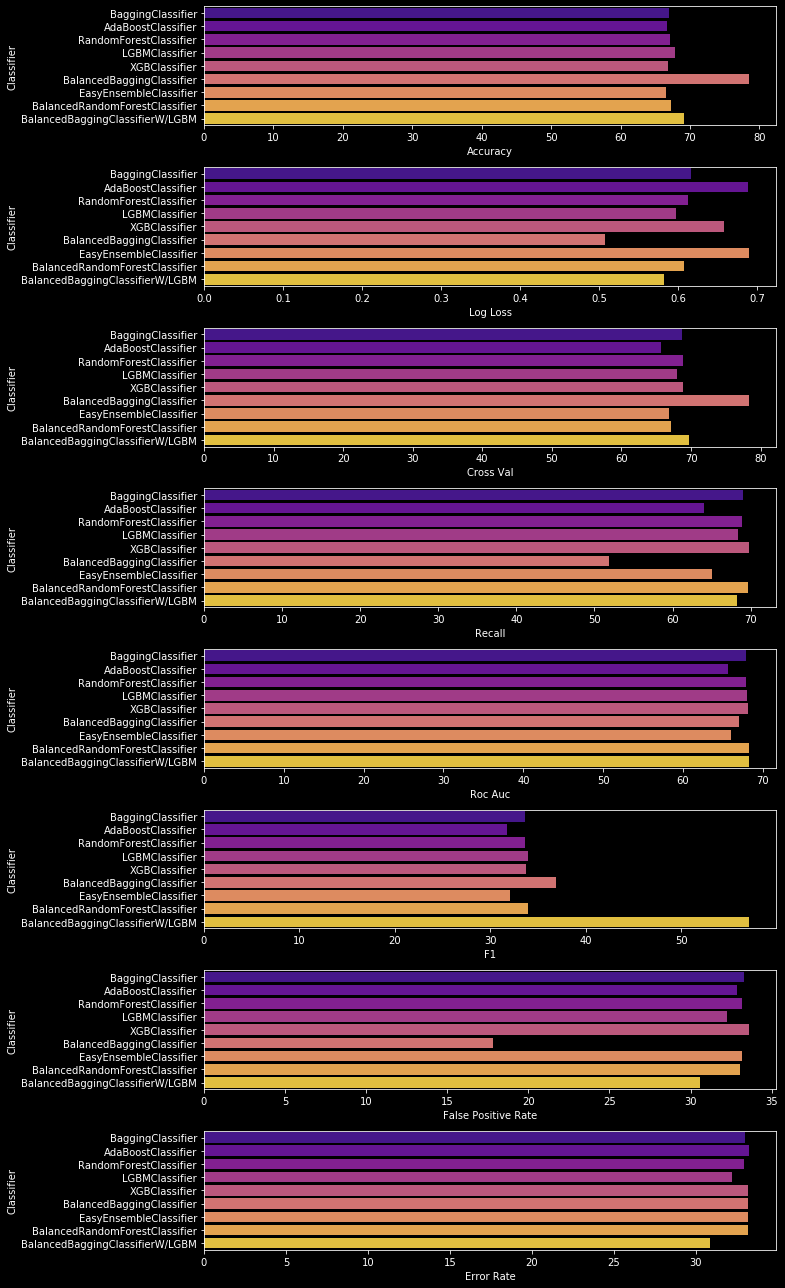

In [84]:
#Visualize scores for all model

fig, ax =plt.subplots(nrows=8, ncols=1, figsize = (11,18))
plt.style.use('dark_background')
sns.barplot(x='Accuracy', y='Classifier', data=ml_results, palette='plasma', ax=ax[0])
sns.barplot(x='Log Loss', y='Classifier', data=ml_results, palette='plasma', ax=ax[1])
sns.barplot(x='Cross Val', y='Classifier', data=ml_results, palette='plasma', ax=ax[2])
sns.barplot(x='Recall', y='Classifier', data=ml_results, palette='plasma', ax=ax[3])
sns.barplot(x='Roc Auc', y='Classifier', data=ml_results, palette='plasma', ax=ax[4])
sns.barplot(x='F1', y='Classifier', data=ml_results, palette='plasma', ax=ax[5])
sns.barplot(x='False Positive Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[6])
sns.barplot(x='Error Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[7])
plt.tight_layout()

plt.show()

In [85]:
ml_results.to_csv('ml_results_final_results.csv')

Genesis L. Taylor<br>
[Github](https://github.com/GenTaylor/) | [Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com)
